In [133]:
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.animation import FuncAnimation
import pandas as pd
from scipy import stats


# Hyper-parameters


In [35]:
## số biến của cá thể: 
D = [2,10]
## kích thước quần thể:
N = [16,32,64,128,256]
## [BL, BU]: miền giá trị của biến

## max_evaluations
max_evaluations = [20_000, 100_000]

"-----------------------DE----------------------"

## F: Hệ số scale (create_mutant_vector)
F = 0.5
## Cr: Xác suất lai ghép 
Cr = 0.7

"----------------------CEM----------------------"

sigma = 0.01
epsilon = 0.001

# Objective Function

In [36]:
def Sphere (x):
    """ 
        Global minimum = [0,...,0] -> f(x) = 0
        Input domain: x_i in range(-5.12, 5.12)
    """
    
    return np.sum(x**2)

x = np.array([1,2,3])
Sphere(x)

14

In [37]:
def Griewank (x):
    """ 
        Global minimum = [0,...,0] -> f(x) = 0
        Input domain: x_i in range(-600, 600)
    """
    
    A = np.sum(x**2/4000)
    B = np.prod( np.cos( x/np.arange(1, len(x)+1) ) )
    
    return A - B + 1

x = np.array([0,0,0])
Griewank(x)

0.0

In [38]:
def Rosenbrock (x):
    """ 
        Global minimum = [1,...,1] -> f(x) = 0
        Input domain: x_i in range(-5, 10)
    """
    
    A = 100 * (x[1:] - x[:-1]**2)**2
    B = (x[:-1] - 1)**2
    
    return np.sum(A+B)

x = np.array([1,1,1])
Rosenbrock(x)

0

In [39]:
def Michalewicz (x, m = 10):
    """ 
        Global minimum: 
            at d = 2 : x = [2.20, 1.57] -> f(x) = -1.8013
            at d = 10:                  -> f(x) = -9.66015
        
        Input domain: x_i in range(0, pi)
    """
    
    A = np.sin(x)
    B = np.sin( (np.arange(1, len(x)+1) * x**2) / np.pi ) ** (2*m)
    
    return -np.sum(A*B)

x = np.array([2.20, 1.57])
Michalewicz(x)

-1.801140718473825

In [40]:
def Ackley (x, a = 20, b = 0.2, c = 2*np.pi):
    """ 
        Global minimum = [0,...,0] -> f(x) = 0
        Input domain: x_i in range(-32.768, 32.768)
    """
    
    A = a * np.exp( -b * np.sqrt( (1/len(x)) * np.sum(x**2) ) )
    B = np.exp( (1/len(x)) * np.sum( np.cos(c*x) ) ) 
    
    return -A - B + a + np.exp(1)

x = np.array([0, 0, 0])
Ackley(x)

4.440892098500626e-16

# DE setup

In [41]:
def initialize_population (N, D, BL, BU):
    """
        N:        Kích thước quần thể
        D:        Số biến – số chiều của một vector (cá thể)
        [BL, BU]: Miền giá trị của biến
    """
    return np.random.uniform(BL, BU, size = (N,D))

P = initialize_population (4, 3, 2, 10)
P , len(P)

(array([[4.83151886, 5.82295848, 3.98772256],
        [5.6185982 , 3.26716765, 3.61123796],
        [5.87801757, 8.30574265, 4.98542924],
        [8.65452649, 5.50172688, 6.60115922]]),
 4)

In [42]:
def DE_create_mutant_vector(P,F, verbose = False):
    """
        F:   Hệ số scale in range(0,1)
        P:   Quần thể gốc
        P_v: Quần thể đột biến
    """
    N = P.shape[0]
    D = P.shape[1]
    
    # random [r0, r1, r2] cho N cá thể
    indices = list(range(0,N))
    r = np.array([ random.sample(indices, 3) for _ in range(N)])
    
    
    x_r0 = P[r[:,0]]
    x_r1 = P[r[:,1]]
    x_r2 = P[r[:,2]]
    
    # Tạo ra quần thể đột biến
    P_v = x_r0 + F * (x_r1 - x_r2)
    
    if verbose == True:
        print("r:", r)
        print("P:", P)
        print()
        print("x_r0: ", x_r0)
        print("x_r1: ", x_r1)
        print("x_r2: ", x_r2)
        print()
        print("P_v:", P_v)
        
    return P_v

P_v = DE_create_mutant_vector(P,0.2, verbose = True)

r: [[2 0 1]
 [2 1 0]
 [3 2 0]
 [3 2 1]]
P: [[4.83151886 5.82295848 3.98772256]
 [5.6185982  3.26716765 3.61123796]
 [5.87801757 8.30574265 4.98542924]
 [8.65452649 5.50172688 6.60115922]]

x_r0:  [[5.87801757 8.30574265 4.98542924]
 [5.87801757 8.30574265 4.98542924]
 [8.65452649 5.50172688 6.60115922]
 [8.65452649 5.50172688 6.60115922]]
x_r1:  [[4.83151886 5.82295848 3.98772256]
 [5.6185982  3.26716765 3.61123796]
 [5.87801757 8.30574265 4.98542924]
 [5.87801757 8.30574265 4.98542924]]
x_r2:  [[5.6185982  3.26716765 3.61123796]
 [4.83151886 5.82295848 3.98772256]
 [4.83151886 5.82295848 3.98772256]
 [5.6185982  3.26716765 3.61123796]]

P_v: [[5.72060171 8.81690082 5.06072616]
 [6.03543344 7.79458449 4.91013232]
 [8.86382623 5.99828372 6.80070055]
 [8.70641037 6.50944188 6.87599747]]


In [43]:
def DE_cross_over (P, P_v, Cr, verbose = False):
    """
        Cr:  Xác suất lai ghép
        P:   Quần thể gốc
        P_v: Quần thể đột biến
        P_u: Quần thể thử nghiệm
    """
    N = P.shape[0]
    D = P.shape[1]
    
    rand   = np.random.uniform( 0, 1, size = P.shape )
    j_rand = np.random.randint( 0, D, size = N )
    
    mask = np.zeros(P.shape)
    mask[rand <= Cr] = 1
    mask[np.arange(0, N) , j_rand] = 1
    
    P_u = np.zeros(P.shape)
    P_u[mask == 1] = P_v[mask == 1]
    P_u[mask == 0] = P[mask == 0]
    
    if verbose == True:
        print("Cr: ", Cr)
        print("rand: ", rand)
        print("j_rand: ", j_rand)
        print()
        print("P:", P)
        print()
        print("P_v:", P_v)
        print()
        print("P_u:", P_u)
    
    return P_u

P_u = DE_cross_over(P, P_v, 0.5, verbose = True)

Cr:  0.5
rand:  [[0.18884445 0.31454644 0.71616247]
 [0.25418291 0.2404974  0.16739095]
 [0.91711928 0.97394876 0.20499177]
 [0.89348267 0.94882272 0.65836993]]
j_rand:  [0 1 2 0]

P: [[4.83151886 5.82295848 3.98772256]
 [5.6185982  3.26716765 3.61123796]
 [5.87801757 8.30574265 4.98542924]
 [8.65452649 5.50172688 6.60115922]]

P_v: [[5.72060171 8.81690082 5.06072616]
 [6.03543344 7.79458449 4.91013232]
 [8.86382623 5.99828372 6.80070055]
 [8.70641037 6.50944188 6.87599747]]

P_u: [[5.72060171 8.81690082 3.98772256]
 [6.03543344 7.79458449 4.91013232]
 [5.87801757 8.30574265 6.80070055]
 [8.70641037 5.50172688 6.60115922]]


In [44]:
def DE_selection (P, f_x, P_u, f_u, verbose = False):
    """
        P:   Quần thể gốc
        P_u: Quần thể thử nghiệm
    """
    
    N = P.shape[0]
    D = P.shape[1]
    
    P_new = np.zeros(P.shape)
    f_new = np.zeros(N)

    P_new[f_u < f_x] = P_u[f_u < f_x]
    f_new[f_u < f_x] = f_u[f_u < f_x]

    P_new[f_u >= f_x] = P[f_u >= f_x]
    f_new[f_u >= f_x] = f_x[f_u >= f_x]

    if verbose == True:
        print(f"f_x: {f_x}")
        print(f"f_u: {f_u}")
        print()
        print("P:", P)
        print()
        print("P_u:", P_u)
        print()
        print("P_new:", P_new)
        print()
        print("f_new:", f_new)
    
    return P_new, f_new

f_u = np.apply_along_axis(Sphere, axis= 1, arr = P_u)
f_x = np.apply_along_axis(Sphere, axis= 1, arr = P)
P_new = DE_selection (P, f_x, P_u, f_u, verbose = True)

f_x: [ 73.15235125  55.28406978 128.39095634 148.74513048]
f_u: [126.3649552  121.29140355 149.78597965 149.64588315]

P: [[4.83151886 5.82295848 3.98772256]
 [5.6185982  3.26716765 3.61123796]
 [5.87801757 8.30574265 4.98542924]
 [8.65452649 5.50172688 6.60115922]]

P_u: [[5.72060171 8.81690082 3.98772256]
 [6.03543344 7.79458449 4.91013232]
 [5.87801757 8.30574265 6.80070055]
 [8.70641037 5.50172688 6.60115922]]

P_new: [[4.83151886 5.82295848 3.98772256]
 [5.6185982  3.26716765 3.61123796]
 [5.87801757 8.30574265 4.98542924]
 [8.65452649 5.50172688 6.60115922]]

f_new: [ 73.15235125  55.28406978 128.39095634 148.74513048]


In [45]:
def DE (objective, N, D, 
        BL,BU,
        F, Cr,
        max_evaluations, 
        verbose=False,
        create_gif = False):
    
    P = initialize_population (N, D, BL, BU)
    f_x = np.apply_along_axis(objective, axis= 1, arr = P)
    ith = 0   # Thế hệ thứ 0
    
    num_evaluations = len(f_x)
    
    best_fitness = []
    best_fitness.append([num_evaluations, np.max(f_x)])

    if verbose:
        print("#Gen 0:")
        print(f_x)
    
    frames = []
    if create_gif:
        frames.append(P)
        
    while num_evaluations < max_evaluations:
        P_v = DE_create_mutant_vector(P,F)
        
        P_u = DE_cross_over (P, P_v, Cr)
        f_u = np.apply_along_axis(objective, axis= 1, arr = P_u)

        P, f_x = DE_selection (P, f_x, P_u, f_u)
        
        num_evaluations += len(f_u)
        
        best_fitness.append(np.array([num_evaluations, np.max(f_x)]))

        ith += 1
        if verbose:
            print(f'#Gen {ith}:')
            print(f_x)
            
        if create_gif:
            frames.append(P)
            
    if create_gif:
        return np.array(frames)
            
    return (P, f_x, np.array(best_fitness))

DE (Sphere, N = N[0], D = D[0], 
    BL = -5.12, BU = 5.12,
    F = F, Cr = Cr,
    max_evaluations = max_evaluations[0], 
    verbose=True)

#Gen 0:
[ 5.36085711 18.66344181 30.91784678 18.48689034 17.96993359 21.73926956
 23.87571277  7.44223498  4.94541206 18.68736636 17.11293983 23.60926391
  5.39427455 16.99380425 11.83269062  4.77829352]
#Gen 1:
[ 5.36085711  5.89742628  0.35074847 18.48689034  3.557672   21.73926956
 23.87571277  7.44223498  4.94541206 18.68736636  2.21640854 23.60926391
  5.39427455 16.99380425  1.69146621  4.77829352]
#Gen 2:
[ 5.36085711  4.6955195   0.35074847  7.90568679  3.557672   21.73926956
 23.87571277  7.44223498  4.94541206 18.68736636  2.21640854 20.40277729
  5.39427455 16.99380425  0.27500956  4.77829352]
#Gen 3:
[ 1.04690622  4.6955195   0.35074847  7.90568679  3.557672    0.10660829
 23.65187015  4.27490466  4.94541206 18.68736636  2.21640854 12.73071994
  5.39427455 16.99380425  0.27500956  2.69931849]
#Gen 4:
[ 1.04690622  3.21974721  0.35074847  7.90568679  3.557672    0.06012643
  6.18742512  4.27490466  0.35158719  0.71727095  2.21640854  9.19476988
  5.39427455 11.19813426  0.10

(array([[-2.12534411e-129, -6.94791398e-129],
        [-3.72163323e-129,  2.05968243e-129],
        [-2.42518624e-129, -2.64989908e-129],
        [-3.16823260e-131, -1.57579937e-129],
        [-5.46579892e-129, -1.54830402e-129],
        [ 1.19916964e-129,  2.70442964e-129],
        [-1.06719036e-129,  3.18004404e-129],
        [ 2.71459832e-130,  4.31830981e-130],
        [-1.73670948e-129,  4.75081834e-129],
        [ 5.06597118e-129,  1.86025120e-129],
        [ 1.58625575e-129,  3.36060433e-129],
        [ 2.11107663e-129, -5.19475965e-129],
        [-1.81086476e-130,  5.99895393e-130],
        [ 2.27931496e-129,  9.22268999e-130],
        [ 2.87435416e-129,  2.98267562e-131],
        [-4.52349148e-130, -8.06479746e-130]]),
 array([5.27905962e-257, 1.80928456e-257, 1.29034935e-257, 2.48414743e-258,
        3.22722032e-257, 8.75194750e-258, 1.12515753e-257, 2.60168436e-259,
        2.55864347e-257, 2.91245985e-257, 1.38098687e-257, 3.14421724e-257,
        3.92666794e-259, 6.0458568

# CEM Setup

In [46]:
def CEM (objective, N, D,
         Ne,
         BL, BU,
         sigma, epsilon,
         max_evaluations, 
         verbose=False,
         create_gif = False):
    
    # Initialization
    C = sigma * np.eye(D)
    
    term1 = np.log(Ne + 1) - np.log( np.arange(1,Ne+1) )
    term2 = np.sum( np.log(Ne + 1) - np.log( np.arange(1,Ne+1) ) )
    w = term1 / term2
    
    u = np.random.uniform(BL, BU, size = D)
    f_u = objective(u)
    
    num_evaluations = 1
    best_fitness = []
    ith = 0
    
    frames_x = []
    frames_C = [C]
    init = u
    
    while num_evaluations < max_evaluations:
        x = np.random.multivariate_normal(mean=u, cov=C, size = N)
        f_x = np.apply_along_axis(objective, axis= 1, arr = x)


        selected_indices = np.argsort(f_x)[:Ne]
        z = x[selected_indices]
        # f_z = f_x[selected_indices]
        
        temp1 = np.array([w[i]*((z[i] - u).reshape(D,1) @ (z[i] - u).reshape(1,D)) for i in range(Ne)])
        C = np.sum(temp1, axis = 0) + epsilon * np.eye(D)
        
        temp2 = np.array([w[i] * z[i] for i in range(Ne)])
        u_new = np.sum(temp2, axis = 0)
        f_u_new = objective(u_new)
        
        if f_u_new < f_u:
            sigma *= (1 - f_u_new/(f_u+0.000001))
            # sigma *= 0.75
        else:
            sigma *= (f_u_new/(f_u + 0.000001))
            # sigma *= 1.25
        
        u = u_new.copy()
        f_u = f_u_new
        
        num_evaluations += (len(f_x) + 1)
        best_fitness.append(np.array([num_evaluations, np.max(f_x)]))

        
        if verbose:
            print(f'#Gen {ith}:')
            print(f_x)
            
        ith += 1

        if create_gif:
            frames_x.append(x)
            frames_C.append(C)
    
    if create_gif:
        return ( init, np.array(frames_x), np.array(frames_C) )

    return (x, f_x, np.array(best_fitness))




CEM (Sphere, N = N[0], D = D[0],
         Ne = 16,
         BL = -5, BU = 5,
         sigma = sigma, epsilon = epsilon,
         max_evaluations = 20_000, 
         verbose=True)

#Gen 0:
[20.76926975 21.63568279 21.79360464 19.14351052 22.05035936 20.37381678
 20.0798896  21.65229939 19.78941319 19.66186248 21.09783169 20.44428946
 21.50701149 20.17174409 20.32170433 21.20775797]
#Gen 1:
[19.6389575  21.11530883 20.62053432 19.44592007 19.4841381  18.59475019
 21.54748394 20.42255251 20.42314568 19.88058402 18.77928006 18.50179008
 20.61229324 21.97319895 19.74550336 19.541056  ]
#Gen 2:
[20.54683287 19.92260952 19.74197276 19.54799986 19.30414368 20.75167412
 19.25639155 19.99181097 18.250332   18.9064901  19.67157862 20.64293484
 18.94177953 19.99522487 17.76345127 19.12716503]
#Gen 3:
[18.65351786 17.52266016 18.07845219 19.51306786 18.21453738 17.24406995
 20.92889495 19.59567075 19.5884548  18.26442474 19.82873784 18.74763194
 18.93996571 18.13383851 18.40092429 17.64610811]
#Gen 4:
[15.04377915 19.13969921 17.17725653 17.14671894 18.85477139 17.13684435
 17.87534778 17.93282977 18.12550064 16.15777841 19.23955466 18.47865853
 17.26522147 19.82412936 16.58

(array([[-0.00709261, -0.01021121],
        [-0.00511749, -0.01969139],
        [ 0.01238713, -0.04220199],
        [-0.04997538, -0.05216581],
        [-0.0267991 ,  0.00280804],
        [-0.01817413, -0.00091134],
        [-0.02947932, -0.02416497],
        [-0.12604654, -0.02801532],
        [-0.01407458,  0.02848173],
        [ 0.05772581, -0.03519117],
        [-0.0550397 , -0.02008269],
        [ 0.00291965, -0.02258406],
        [-0.06832913, -0.01317885],
        [-0.05127016,  0.02723992],
        [-0.06072924,  0.02990812],
        [ 0.11466449,  0.00535197]]),
 array([0.00015457, 0.00041394, 0.00193445, 0.00521881, 0.00072608,
        0.00033113, 0.00145298, 0.01667259, 0.0010093 , 0.00457069,
        0.00343268, 0.00051856, 0.00484255, 0.00337064, 0.00458254,
        0.01317659]),
 array([[1.80000000e+01, 2.20503594e+01],
        [3.50000000e+01, 2.19731989e+01],
        [5.20000000e+01, 2.07516741e+01],
        ...,
        [1.99760000e+04, 1.99844777e-02],
        [1.9993

# Experiment

In [47]:
objective = [Sphere, Griewank, Rosenbrock, Michalewicz, Ackley]
B = [(-5.12, 5.12), (-600,600), (-5,10), (0, np.pi), (-32.768, 32.768)]
D = [2,10]
N = [16,32,64,128,256]
max_evaluations = [20_000, 100_000]

"-----------------------DE----------------------"

## F: Hệ số scale (create_mutant_vector)
F = 0.5
## Cr: Xác suất lai ghép 
Cr = 0.7

"----------------------CEM----------------------"

sigma = 0.01
epsilon = 0.001

In [48]:
def DE_experiment (objective, N, D, 
                   BL, BU, 
                   F, Cr,
                   max_evaluations):
    
    result = {
        'random_seed': [],
        'best_x': [],
        'best_fx': [],
        'best_fitness': []
    }
    for i in range(10):
        np.random.seed(21522490+i)
        
        x, f_x, best_fitness = DE (objective, N = N, D = D, 
                                   BL = BL, BU = BU,
                                   F = F, Cr = Cr,
                                   max_evaluations = max_evaluations)
        index = np.argmax(f_x)
        best_x = x[index]
        best_fx = np.max(f_x)

        
        result['random_seed'].append(21522490+i)
        result['best_x'].append(best_x)
        result['best_fx'].append(best_fx)
        result['best_fitness'].append(best_fitness)
        
    return pd.DataFrame(result), result

In [49]:
result_df, result = DE_experiment (objective[0], N = N[0], D = D[0], 
                        BL = B[0][0], BU = B[0][1],
                        F = F, Cr = Cr,
                        max_evaluations= max_evaluations[0])

# Convert DataFrame to string without truncation
result_str = result_df[['random_seed', 'best_x', 'best_fx']].to_string(index=False)

# Print the string
print(result_str)


 random_seed                                              best_x       best_fx
    21522490    [-3.62008641255447e-131, 4.955123553814904e-131] 3.765828e-261
    21522491     [5.887686753864141e-131, 7.08058895271821e-132] 3.516620e-261
    21522492   [-2.011186973441257e-129, 2.512632622614852e-130] 4.108006e-258
    21522493  [8.132325955736591e-130, -2.7308081999984085e-129] 8.118661e-258
    21522494  [1.4856977655842866e-126, 1.3429097607432178e-126] 4.010704e-252
    21522495 [-1.8708624940833968e-127, -2.647471055463896e-127] 1.050923e-253
    21522496  [2.5420868406772263e-129, 1.3227034485884124e-128] 1.814166e-256
    21522497     [7.199197455995354e-128, 7.09946920612237e-129] 5.233247e-255
    21522498   [3.2439845905342545e-132, 7.101119652635209e-132] 6.094934e-263
    21522499 [-5.650883934598286e-130, -4.6633336366875426e-130] 5.367917e-259


In [50]:
def CEM_experiment (objective, N, D, 
                    Ne,
                    BL, BU, 
                    sigma, epsilon,
                    max_evaluations):
    
    
    result = {
        'random_seed': [],
        'best_x': [],
        'best_fx': [],
        'best_fitness': []
    }
    for i in range(10):
        np.random.seed(21522490+i)
        
        x, f_x, best_fitness = CEM (objective, N = N, D = D, 
                                    Ne = Ne,
                                    BL = BL, BU = BU,
                                    sigma=sigma, epsilon=epsilon,
                                    max_evaluations = max_evaluations)
        index = np.argmax(f_x)
        best_x = x[index]
        best_fx = np.max(f_x)

        
        result['random_seed'].append(21522490+i)
        result['best_x'].append(best_x)
        result['best_fx'].append(best_fx)
        result['best_fitness'].append(best_fitness)
    
    return pd.DataFrame(result), result

In [51]:
result_df, result = CEM_experiment (objective[0], N = N[0], D = D[0], 
                         Ne = int(N[0]/2),       
                         BL = B[0][0], BU = B[0][1],
                         sigma=sigma, epsilon=epsilon,
                         max_evaluations= max_evaluations[0])

# Convert DataFrame to string without truncation
result_str = result_df[['random_seed', 'best_x', 'best_fx']].to_string(index=False)

# Print the string
print(result_str)

 random_seed                                       best_x  best_fx
    21522490  [0.06357103769844308, -0.03124964937183164] 0.005018
    21522491 [-0.07904575588989055, -0.07612198028097066] 0.012043
    21522492  [0.006940178395340665, -0.0840064586942412] 0.007105
    21522493  [0.02658112623822616, -0.09513662848683771] 0.009758
    21522494  [0.04727398006524061, -0.05141736826100406] 0.004879
    21522495  [0.05192159800924836, -0.09126404627486441] 0.011025
    21522496 [0.055552243509689625, 0.028483899614672296] 0.003897
    21522497 [-0.06885651653462833, -0.06215189837381173] 0.008604
    21522498  [0.05473418632066511, -0.06030381823571275] 0.006632
    21522499  [-0.08042380427502353, 0.06661117058146507] 0.010905


## Sphere

### DE logs

In [52]:
## F: Hệ số scale (create_mutant_vector)
F = 0.5
## Cr: Xác suất lai ghép 
Cr = 0.7

In [53]:
DE_Sphere_D2 = {}
DE_Sphere_D10 = {}

In [54]:
for d in range(len(D)):
    for n in range(len(N)):
        
        result_df, result = DE_experiment (objective[0], N = N[n], D = D[d], 
                                BL = B[0][0], BU = B[0][1],
                                F = F, Cr = Cr,
                                max_evaluations= max_evaluations[d])
        if D[d] == 2:
            DE_Sphere_D2[N[n]] = np.array(result['best_fitness'])
        else:
            DE_Sphere_D10[N[n]] = np.array(result['best_fitness'])

             
        print(f'$** D = {D[d]}, N = {N[n]} **$')
        result_str = result_df[['random_seed', 'best_x', 'best_fx']].to_string(index=False)
        print(result_str)


$** D = 2, N = 16 **$
 random_seed                                              best_x       best_fx
    21522490   [3.868458323097324e-132, 1.1651521197521405e-131] 1.507229e-262
    21522491   [-3.358458835788742e-129, 2.217776268911426e-129] 1.619778e-257
    21522492   [6.147900850570137e-130, 1.0264644365503725e-128] 1.057409e-256
    21522493 [-1.1026275621271177e-128, 1.5481885429946925e-128] 3.612675e-256
    21522494 [-2.5720945937047862e-130, 3.2420818927587637e-130] 1.712677e-259
    21522495 [-1.4118292762539176e-130, -1.451083590442035e-130] 4.098905e-260
    21522496 [-2.4956636994764127e-130, -4.848102156989682e-131] 6.463378e-260
    21522497   [-8.904979637519411e-128, 8.101114646540067e-128] 1.449267e-254
    21522498     [2.87653067080024e-129, 1.173803419341875e-128] 1.460559e-256
    21522499  [2.009700648362646e-129, -1.0283861000957388e-128] 1.097967e-256
$** D = 2, N = 32 **$
 random_seed                                            best_x       best_fx
    215224

### CEM logs

In [55]:
sigma = 0.01
epsilon = 0.001

In [56]:
CEM_Sphere_D2 = {}
CEM_Sphere_D10 = {}

In [57]:
for d in range(len(D)):
    for n in range(len(N)):
        
        result_df, result = CEM_experiment (objective[0], N = N[n], D = D[d], 
                                            Ne = int(N[n]/2),
                                            BL = B[0][0], BU = B[0][1],
                                            sigma =sigma, epsilon=epsilon,
                                            max_evaluations= max_evaluations[d])
        if D[d] == 2:
            CEM_Sphere_D2[N[n]] = np.array(result['best_fitness'])
        else:
            CEM_Sphere_D10[N[n]] = np.array(result['best_fitness'])

             
        print(f'$** D = {D[d]}, N = {N[n]} **$')
        result_str = result_df[['random_seed', 'best_x', 'best_fx']].to_string(index=False)
        print(result_str)

$** D = 2, N = 16 **$
 random_seed                                       best_x  best_fx
    21522490  [0.06357103769844308, -0.03124964937183164] 0.005018
    21522491 [-0.07904575588989055, -0.07612198028097066] 0.012043
    21522492  [0.006940178395340665, -0.0840064586942412] 0.007105
    21522493  [0.02658112623822616, -0.09513662848683771] 0.009758
    21522494  [0.04727398006524061, -0.05141736826100406] 0.004879
    21522495  [0.05192159800924836, -0.09126404627486441] 0.011025
    21522496 [0.055552243509689625, 0.028483899614672296] 0.003897
    21522497 [-0.06885651653462833, -0.06215189837381173] 0.008604
    21522498  [0.05473418632066511, -0.06030381823571275] 0.006632
    21522499  [-0.08042380427502353, 0.06661117058146507] 0.010905
$** D = 2, N = 32 **$
 random_seed                                        best_x  best_fx
    21522490   [-0.09065139663453511, -0.0480767868730439] 0.010529
    21522491   [-0.06367902846937683, 0.10157085763065253] 0.014372
    21522492  [

### Sphere_D2 table

In [58]:
print(DE_Sphere_D2[16].shape)
DE_Sphere_D2_mean = np.array([np.average(DE_Sphere_D2[n][:,-1,1], axis = 0) for n in N])

DE_Sphere_D2_std = np.array([np.std(DE_Sphere_D2[n][:,-1,1], axis = 0) for n in N])

print(DE_Sphere_D2_mean.shape, DE_Sphere_D2_std.shape)
print(DE_Sphere_D2_mean)
print(DE_Sphere_D2_std)

(10, 1250, 2)
(5,) (5,)
[1.52320079e-255 2.43308788e-128 2.83559368e-064 1.62101269e-031
 7.94897389e-015]
[0.00000000e+000 4.45125237e-128 4.55498725e-064 9.85345351e-032
 7.44153220e-015]


In [59]:
print(CEM_Sphere_D2[16].shape)
CEM_Sphere_D2_mean = np.array([np.average(CEM_Sphere_D2[n][:,-1,1], axis = 0) for n in N])

CEM_Sphere_D2_std = np.array([np.std(CEM_Sphere_D2[n][:,-1,1], axis = 0) for n in N])

print(CEM_Sphere_D2_mean.shape, CEM_Sphere_D2_std.shape)
print(CEM_Sphere_D2_mean)
print(CEM_Sphere_D2_std)

(10, 1177, 2)
(5,) (5,)
[0.00798658 0.00968336 0.00970359 0.01429786 0.01539111]
[0.00274818 0.00214908 0.00153075 0.00417786 0.00306845]


In [139]:
Sphere_D2_table = {
    'DE_mean': DE_Sphere_D2_mean,
    'DE_std': DE_Sphere_D2_std,
    'CEM_mean': CEM_Sphere_D2_mean,
    'CEM_std': CEM_Sphere_D2_std
}

df = pd.DataFrame(Sphere_D2_table, index = N)

def highlight_min(s):
    """
    Highlight the minimum value in each row.
    """
    is_min = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_min]

# t_test
t_test_Sphere_D2 = []

for n in N:
    print(f"Case: Sphere_D2_{n}:")
    sample1 = DE_Sphere_D2[n][:,-1,1]
    sample2 = CEM_Sphere_D2[n][:,-1,1]

    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(sample1, sample2)

    # Print results
    print("  T-statistic:", t_statistic)
    print("  P-value:", p_value)

    # Interpret the results
    alpha = 0.05  # significance level
    if p_value < alpha:
        print("  Reject the null hypothesis: The means are significantly different.")
        t_test_Sphere_D2.append(1)
        
    else:
        print("  Fail to reject the null hypothesis: The means are not significantly different.")
        t_test_Sphere_D2.append(0)


df['t_test'] = t_test_Sphere_D2
df


# Apply styling to each row
styled_df = df.style.apply(highlight_min, subset=['DE_mean', 'CEM_mean'], axis=1)

# Display styled DataFrame
styled_df


Case: Sphere_D2_16:
  T-statistic: -8.718400570874214
  P-value: 7.051453133557573e-08
  Reject the null hypothesis: The means are significantly different.
Case: Sphere_D2_32:
  T-statistic: -13.517450006992764
  P-value: 7.255534735653624e-11
  Reject the null hypothesis: The means are significantly different.
Case: Sphere_D2_64:
  T-statistic: -19.017348686787493
  P-value: 2.2943041042551837e-13
  Reject the null hypothesis: The means are significantly different.
Case: Sphere_D2_128:
  T-statistic: -10.2668887527649
  P-value: 5.945667495862207e-09
  Reject the null hypothesis: The means are significantly different.
Case: Sphere_D2_256:
  T-statistic: -15.047794091090601
  P-value: 1.2221881647589634e-11
  Reject the null hypothesis: The means are significantly different.


,DE_mean,DE_std,CEM_mean,CEM_std,t_test
16,0.000000,0.000000,0.007987,0.002748,1
32,0.000000,0.000000,0.009683,0.002149,1
64,0.000000,0.000000,0.009704,0.001531,1
128,0.000000,0.000000,0.014298,0.004178,1
256,0.000000,0.000000,0.015391,0.003068,1


### Sphere_D10 table

In [61]:
print(DE_Sphere_D10[16].shape)
DE_Sphere_D10_mean = np.array([np.average(DE_Sphere_D10[n][:,-1,1], axis = 0) for n in N])

DE_Sphere_D10_std = np.array([np.std(DE_Sphere_D10[n][:,-1,1], axis = 0) for n in N])

print(DE_Sphere_D10_mean.shape, DE_Sphere_D10_std.shape)
print(DE_Sphere_D10_mean)
print(DE_Sphere_D10_std)

(10, 6250, 2)
(5,) (5,)
[1.55215200e-004 6.09471103e-139 1.04133258e-066 6.29959116e-032
 6.08517300e-015]
[4.65645599e-004 1.27768536e-138 1.21923066e-066 3.67133597e-032
 2.15479891e-015]


In [62]:
print(CEM_Sphere_D10[16].shape)
CEM_Sphere_D10_mean = np.array([np.average(CEM_Sphere_D10[n][:,-1,1], axis = 0) for n in N])

CEM_Sphere_D10_std = np.array([np.std(CEM_Sphere_D10[n][:,-1,1], axis = 0) for n in N])

print(CEM_Sphere_D10_mean.shape, CEM_Sphere_D10_std.shape)
print(CEM_Sphere_D10_mean)
print(CEM_Sphere_D10_std)

(10, 5883, 2)
(5,) (5,)
[0.04941037 0.053006   0.05064655 0.04833111 0.05508178]
[0.01357807 0.01826333 0.00640998 0.00567259 0.00943378]


In [138]:
Sphere_D10_table = {
    'DE_mean': DE_Sphere_D10_mean,
    'DE_std': DE_Sphere_D10_std,
    'CEM_mean': CEM_Sphere_D10_mean,
    'CEM_std': CEM_Sphere_D10_std
}

df = pd.DataFrame(Sphere_D10_table, index = N)

def highlight_min(s):
    """
    Highlight the minimum value in each row.
    """
    is_min = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_min]

# t_test
t_test_Sphere_D10 = []

for n in N:
    print(f"Case: Sphere_D10_{n}:")
    sample1 = DE_Sphere_D10[n][:,-1,1]
    sample2 = CEM_Sphere_D10[n][:,-1,1]

    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(sample1, sample2)

    # Print results
    print("  T-statistic:", t_statistic)
    print("  P-value:", p_value)

    # Interpret the results
    alpha = 0.05  # significance level
    if p_value < alpha:
        print("  Reject the null hypothesis: The means are significantly different.")
        t_test_Sphere_D10.append(1)
        
    else:
        print("  Fail to reject the null hypothesis: The means are not significantly different.")
        t_test_Sphere_D10.append(0)


df['t_test'] = t_test_Sphere_D10
df


# Apply styling to each row
styled_df = df.style.apply(highlight_min, subset=['DE_mean', 'CEM_mean'], axis=1)

# Display styled DataFrame
styled_df


Case: Sphere_D10_16:
  T-statistic: -10.876260450972394
  P-value: 2.4153040404820345e-09
  Reject the null hypothesis: The means are significantly different.
Case: Sphere_D10_32:
  T-statistic: -8.70695768275413
  P-value: 7.189093793771267e-08
  Reject the null hypothesis: The means are significantly different.
Case: Sphere_D10_64:
  T-statistic: -23.70362420272139
  P-value: 5.0345584149840325e-15
  Reject the null hypothesis: The means are significantly different.
Case: Sphere_D10_128:
  T-statistic: -25.560320550180094
  P-value: 1.3446474951485119e-15
  Reject the null hypothesis: The means are significantly different.
Case: Sphere_D10_256:
  T-statistic: -17.516346669567227
  P-value: 9.3762159183982e-13
  Reject the null hypothesis: The means are significantly different.


,DE_mean,DE_std,CEM_mean,CEM_std,t_test
16,0.000155,0.000466,0.049410,0.013578,1
32,0.000000,0.000000,0.053006,0.018263,1
64,0.000000,0.000000,0.050647,0.006410,1
128,0.000000,0.000000,0.048331,0.005673,1
256,0.000000,0.000000,0.055082,0.009434,1


### Plot:  D=2, N = 128

(10, 157, 2) (157, 2) (157, 2)
(10, 156, 2) (156, 2) (156, 2)


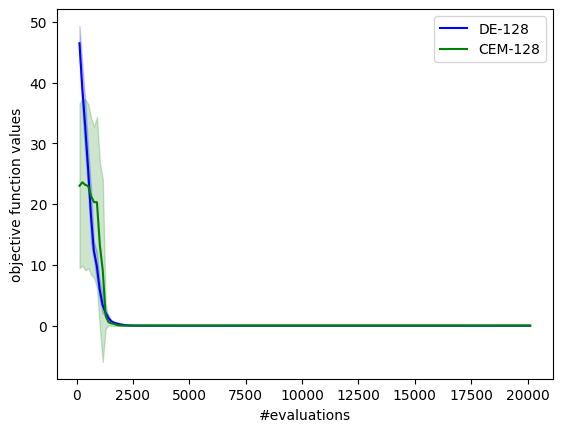

In [64]:
DE_Sphere_D2_N128_average = np.average(DE_Sphere_D2[128], axis = 0)
DE_Sphere_D2_N128_std = np.std(DE_Sphere_D2[128], axis = 0)
print(DE_Sphere_D2[128].shape, DE_Sphere_D2_N128_average.shape, DE_Sphere_D2_N128_std.shape)


CEM_Sphere_D2_N128_average = np.average(CEM_Sphere_D2[128], axis = 0)
CEM_Sphere_D2_N128_std = np.std(CEM_Sphere_D2[128], axis = 0)
print(CEM_Sphere_D2[128].shape, CEM_Sphere_D2_N128_average.shape, CEM_Sphere_D2_N128_std.shape)

fig, ax = plt.subplots()
ax.plot(DE_Sphere_D2_N128_average[:,0],DE_Sphere_D2_N128_average[:,1], color = "blue", label = 'DE-128')
ax.fill_between(DE_Sphere_D2_N128_average[:,0],
                DE_Sphere_D2_N128_average[:,1] + DE_Sphere_D2_N128_std[:,1],
                DE_Sphere_D2_N128_average[:,1] - DE_Sphere_D2_N128_std[:,1],
                alpha = 0.2, color = "blue")

ax.plot(CEM_Sphere_D2_N128_average[:,0], CEM_Sphere_D2_N128_average[:,1], color = 'green', label = 'CEM-128')
ax.fill_between(CEM_Sphere_D2_N128_average[:,0],
                CEM_Sphere_D2_N128_average[:,1] + CEM_Sphere_D2_N128_std[:,1],
                CEM_Sphere_D2_N128_average[:,1] - CEM_Sphere_D2_N128_std[:,1],
                alpha = 0.2, color = "green")

ax.legend()
ax.set_xlabel("#evaluations")
ax.set_ylabel("objective function values")

plt.show()

### Plot: D = 10, N = 128

(10, 782, 2) (782, 2) (782, 2)
(10, 776, 2) (776, 2) (776, 2)


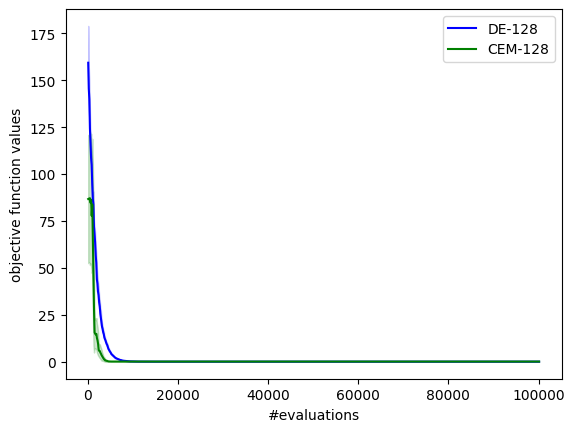

In [65]:
DE_Sphere_D10_N128_average = np.average(DE_Sphere_D10[128], axis = 0)
DE_Sphere_D10_N128_std = np.std(DE_Sphere_D10[128], axis = 0)
print(DE_Sphere_D10[128].shape, DE_Sphere_D10_N128_average.shape, DE_Sphere_D10_N128_std.shape)


CEM_Sphere_D10_N128_average = np.average(CEM_Sphere_D10[128], axis = 0)
CEM_Sphere_D10_N128_std = np.std(CEM_Sphere_D10[128], axis = 0)
print(CEM_Sphere_D10[128].shape, CEM_Sphere_D10_N128_average.shape, CEM_Sphere_D10_N128_std.shape)

fig, ax = plt.subplots()
ax.plot(DE_Sphere_D10_N128_average[:,0],DE_Sphere_D10_N128_average[:,1], color = "blue", label = 'DE-128')
ax.fill_between(DE_Sphere_D10_N128_average[:,0],
                DE_Sphere_D10_N128_average[:,1] + DE_Sphere_D10_N128_std[:,1],
                DE_Sphere_D10_N128_average[:,1] - DE_Sphere_D10_N128_std[:,1],
                alpha = 0.2, color = "blue")

ax.plot(CEM_Sphere_D10_N128_average[:,0], CEM_Sphere_D10_N128_average[:,1], color = 'green', label = 'CEM-128')
ax.fill_between(CEM_Sphere_D10_N128_average[:,0],
                CEM_Sphere_D10_N128_average[:,1] + CEM_Sphere_D10_N128_std[:,1],
                CEM_Sphere_D10_N128_average[:,1] - CEM_Sphere_D10_N128_std[:,1],
                alpha = 0.2, color = "green")

ax.legend()
ax.set_xlabel("#evaluations")
ax.set_ylabel("objective function values")

plt.show()

## Griewank

### DE_logs

In [66]:
## F: Hệ số scale (create_mutant_vector)
F = 0.5
## Cr: Xác suất lai ghép 
Cr = 0.7

In [67]:
DE_Griewank_D2 = {}
DE_Griewank_D10 = {}

In [68]:
for d in range(len(D)):
    for n in range(len(N)):
        
        result_df, result = DE_experiment (objective[1], N = N[n], D = D[d], 
                                BL = B[1][0], BU = B[1][1],
                                F = F, Cr = Cr,
                                max_evaluations= max_evaluations[d])
        if D[d] == 2:
            DE_Griewank_D2[N[n]] = np.array(result['best_fitness'])
        else:
            DE_Griewank_D10[N[n]] = np.array(result['best_fitness'])

             
        print(f'$** D = {D[d]}, N = {N[n]} **$')
        result_str = result_df[['random_seed', 'best_x', 'best_fx']].to_string(index=False)
        print(result_str)

$** D = 2, N = 16 **$
 random_seed                                             best_x  best_fx
    21522490   [2.2351008518446654e-09, 1.3165955922345263e-08]      0.0
    21522491  [-1.0349489498390734e-08, -6.955192607142093e-09]      0.0
    21522492   [7.355801911485678e-09, -1.2185673109677642e-09]      0.0
    21522493   [8.513787219880372e-09, -1.3721765265201154e-08]      0.0
    21522494  [-7.3683468953664816e-09, 1.2164001423238785e-08]      0.0
    21522495  [-2.2132216585390285e-09, -5.364784568963447e-09]      0.0
    21522496 [-2.9753721335587717e-09, -3.5046663660819505e-09]      0.0
    21522497      [6.16892485503844e-09, 9.827151591486946e-09]      0.0
    21522498  [-4.436357710812598e-09, -4.0159411863488635e-09]      0.0
    21522499     [4.039595892695423e-09, 5.027923830274841e-09]      0.0
$** D = 2, N = 32 **$
 random_seed                                             best_x  best_fx
    21522490 [-1.8140363076821551e-09, -1.4694541672725105e-08]      0.0
    215

### CEM logs

In [69]:
sigma = 27
epsilon = 0.0001

In [70]:
CEM_Griewank_D2 = {}
CEM_Griewank_D10 = {}

In [71]:
for d in range(len(D)):
    for n in range(len(N)):
        
        result_df, result = CEM_experiment (objective[1], N = N[n], D = D[d], 
                                            Ne = int(N[n]/2),
                                            BL = B[1][0], BU = B[1][1],
                                            sigma =sigma, epsilon=epsilon,
                                            max_evaluations= max_evaluations[d])
        if D[d] == 2:
            CEM_Griewank_D2[N[n]] = np.array(result['best_fitness'])   
        else:
            CEM_Griewank_D10[N[n]] = np.array(result['best_fitness'])

             
        print(f'$** D = {D[d]}, N = {N[n]} **$')
        result_str = result_df[['random_seed', 'best_x', 'best_fx']].to_string(index=False)
        print(result_str)

$** D = 2, N = 16 **$
 random_seed                                         best_x   best_fx
    21522490      [53.357299037375356, -144.22622435666733]  5.923558
    21522491      [-31.432651747952804, -62.71864570735354]  1.232151
    21522492 [-0.016875983882139612, -0.001172107691832859]  0.000143
    21522493        [266.8734390832483, 219.47127383605522] 29.884161
    21522494       [97.36415107374786, -131.69177604343074]  6.714065
    21522495      [-307.72911768757666, 225.70069294012765] 36.450303
    21522496      [-131.8662999066953, -213.20222924477264] 15.736757
    21522497       [-298.31378588902766, 282.1947253326407] 42.202719
    21522498       [128.75181970157368, -495.3514521591762] 65.616072
    21522499        [-91.08859746882186, 232.0103546620088] 15.558830
$** D = 2, N = 32 **$
 random_seed                                       best_x   best_fx
    21522490     [43.92932562269921, -137.96064048284367]  5.251182
    21522491    [-47.136290289489025, -56.42209927

### Griewandk_D2 table

In [72]:
print(DE_Griewank_D2[16].shape)
DE_Griewank_D2_mean = np.array([np.average(DE_Griewank_D2[n][:,-1,1], axis = 0) for n in N])

DE_Griewank_D2_std = np.array([np.std(DE_Griewank_D2[n][:,-1,1], axis = 0) for n in N])

print(DE_Griewank_D2_mean.shape, DE_Griewank_D2_std.shape)
print(DE_Griewank_D2_mean)
print(DE_Griewank_D2_std)

(10, 1250, 2)
(5,) (5,)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 4.44089210e-17
 6.93681533e-02]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 8.88178420e-17
 1.72843538e-02]


In [73]:
print(CEM_Griewank_D2[16].shape)
CEM_Griewank_D2_mean = np.array([np.average(CEM_Griewank_D2[n][:,-1,1], axis = 0) for n in N])

CEM_Griewank_D2_std = np.array([np.std(CEM_Griewank_D2[n][:,-1,1], axis = 0) for n in N])

print(CEM_Griewank_D2_mean.shape, CEM_Griewank_D2_std.shape)
print(CEM_Griewank_D2_mean)
print(CEM_Griewank_D2_std)

(10, 1177, 2)
(5,) (5,)
[21.93187591  7.86382473  2.97198555  0.54553313  0.2519002 ]
[20.17315626  9.46822507  5.32436364  0.76248563  0.59105382]


In [137]:
Griewank_D2_table = {
    'DE_mean': DE_Griewank_D2_mean,
    'DE_std': DE_Griewank_D2_std,
    'CEM_mean': CEM_Griewank_D2_mean,
    'CEM_std': CEM_Griewank_D2_std
}

df = pd.DataFrame(Griewank_D2_table, index = N)

def highlight_min(s):
    """
    Highlight the minimum value in each row.
    """
    is_min = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_min]

# t_test
t_test_Griewank_D2 = []

for n in N:
    print(f"Case: Griewank_D2_{n}:")
    sample1 = DE_Griewank_D2[n][:,-1,1]
    sample2 = CEM_Griewank_D2[n][:,-1,1]

    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(sample1, sample2)

    # Print results
    print("  T-statistic:", t_statistic)
    print("  P-value:", p_value)

    # Interpret the results
    alpha = 0.05  # significance level
    if p_value < alpha:
        print("  Reject the null hypothesis: The means are significantly different.")
        t_test_Griewank_D2.append(1)
        
    else:
        print("  Fail to reject the null hypothesis: The means are not significantly different.")
        t_test_Griewank_D2.append(0)


df['t_test'] = t_test_Griewank_D2
df


# Apply styling to each row
styled_df = df.style.apply(highlight_min, subset=['DE_mean', 'CEM_mean'], axis=1)

# Display styled DataFrame
styled_df


Case: Griewank_D2_16:
  T-statistic: -3.261543552299162
  P-value: 0.004333758409134496
  Reject the null hypothesis: The means are significantly different.
Case: Griewank_D2_32:
  T-statistic: -2.491646957032164
  P-value: 0.0226985364185976
  Reject the null hypothesis: The means are significantly different.
Case: Griewank_D2_64:
  T-statistic: -1.6745581727945957
  P-value: 0.1113072179754182
  Fail to reject the null hypothesis: The means are not significantly different.
Case: Griewank_D2_128:
  T-statistic: -2.146400302380344
  P-value: 0.045720927521220846
  Reject the null hypothesis: The means are significantly different.
Case: Griewank_D2_256:
  T-statistic: -0.9260783461283354
  P-value: 0.36665608846247566
  Fail to reject the null hypothesis: The means are not significantly different.


,DE_mean,DE_std,CEM_mean,CEM_std,t_test
16,0.000000,0.000000,21.931876,20.173156,1
32,0.000000,0.000000,7.863825,9.468225,1
64,0.000000,0.000000,2.971986,5.324364,0
128,0.000000,0.000000,0.545533,0.762486,1
256,0.069368,0.017284,0.251900,0.591054,0


### Griewank_D10 table

In [75]:
print(DE_Griewank_D10[16].shape)
DE_Griewank_D10_mean = np.array([np.average(DE_Griewank_D10[n][:,-1,1], axis = 0) for n in N])

DE_Griewank_D10_std = np.array([np.std(DE_Griewank_D10[n][:,-1,1], axis = 0) for n in N])

print(DE_Griewank_D10_mean.shape, DE_Griewank_D10_std.shape)
print(DE_Griewank_D10_mean)
print(DE_Griewank_D10_std)

(10, 6250, 2)
(5,) (5,)
[1.95325901e-02 2.45732941e-03 0.00000000e+00 1.08801856e-15
 5.86969661e-02]
[3.96569680e-02 7.37198823e-03 0.00000000e+00 3.08106393e-15
 6.52876732e-02]


In [76]:
print(CEM_Griewank_D10[16].shape)
CEM_Griewank_D10_mean = np.array([np.average(CEM_Griewank_D10[n][:,-1,1], axis = 0) for n in N])

CEM_Griewank_D10_std = np.array([np.std(CEM_Griewank_D10[n][:,-1,1], axis = 0) for n in N])

print(CEM_Griewank_D10_mean.shape, CEM_Griewank_D10_std.shape)
print(CEM_Griewank_D10_mean)
print(CEM_Griewank_D10_std)

(10, 5883, 2)
(5,) (5,)
[1.92159249 3.56918818 5.32951963 3.08058151 3.1140709 ]
[1.48472802 2.99480088 4.32522936 2.43606892 2.16947218]


In [140]:
Griewank_D10_table = {
    'DE_mean': DE_Griewank_D10_mean,
    'DE_std': DE_Griewank_D10_std,
    'CEM_mean': CEM_Griewank_D10_mean,
    'CEM_std': CEM_Griewank_D10_std
}

df = pd.DataFrame(Griewank_D10_table, index = N)

def highlight_min(s):
    """
    Highlight the minimum value in each row.
    """
    is_min = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_min]

# t_test
t_test_Griewank_D10 = []

for n in N:
    print(f"Case: Griewank_D10_{n}:")
    sample1 = DE_Griewank_D10[n][:,-1,1]
    sample2 = CEM_Griewank_D10[n][:,-1,1]

    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(sample1, sample2)

    # Print results
    print("  T-statistic:", t_statistic)
    print("  P-value:", p_value)

    # Interpret the results
    alpha = 0.05  # significance level
    if p_value < alpha:
        print("  Reject the null hypothesis: The means are significantly different.")
        t_test_Griewank_D10.append(1)
        
    else:
        print("  Fail to reject the null hypothesis: The means are not significantly different.")
        t_test_Griewank_D10.append(0)


df['t_test'] = t_test_Griewank_D10
df


# Apply styling to each row
styled_df = df.style.apply(highlight_min, subset=['DE_mean', 'CEM_mean'], axis=1)

# Display styled DataFrame
styled_df


Case: Griewank_D10_16:
  T-statistic: -3.841878961482828
  P-value: 0.0011945378433694616
  Reject the null hypothesis: The means are significantly different.
Case: Griewank_D10_32:
  T-statistic: -3.572912053345728
  P-value: 0.0021743213873359757
  Reject the null hypothesis: The means are significantly different.
Case: Griewank_D10_64:
  T-statistic: -3.6965805866945307
  P-value: 0.0016511860545993537
  Reject the null hypothesis: The means are significantly different.
Case: Griewank_D10_128:
  T-statistic: -3.7937122677448976
  P-value: 0.0013298943411354292
  Reject the null hypothesis: The means are significantly different.
Case: Griewank_D10_256:
  T-statistic: -4.223135066086199
  P-value: 0.0005112622080974744
  Reject the null hypothesis: The means are significantly different.


,DE_mean,DE_std,CEM_mean,CEM_std,t_test
16,0.019533,0.039657,1.921592,1.484728,1
32,0.002457,0.007372,3.569188,2.994801,1
64,0.000000,0.000000,5.329520,4.325229,1
128,0.000000,0.000000,3.080582,2.436069,1
256,0.058697,0.065288,3.114071,2.169472,1


### Plot:  D = 2, N = 128

(10, 157, 2) (157, 2) (157, 2)
(10, 156, 2) (156, 2) (156, 2)


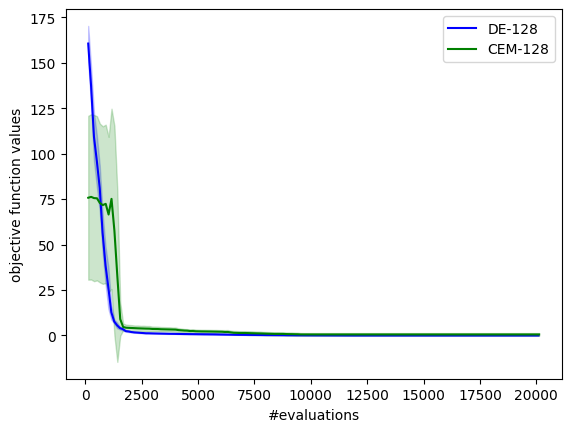

In [78]:
DE_Griewank_D2_N128_average = np.average(DE_Griewank_D2[128], axis = 0)
DE_Griewank_D2_N128_std = np.std(DE_Griewank_D2[128], axis = 0)
print(DE_Griewank_D2[128].shape, DE_Griewank_D2_N128_average.shape, DE_Griewank_D2_N128_std.shape)


CEM_Griewank_D2_N128_average = np.average(CEM_Griewank_D2[128], axis = 0)
CEM_Griewank_D2_N128_std = np.std(CEM_Griewank_D2[128], axis = 0)
print(CEM_Griewank_D2[128].shape, CEM_Griewank_D2_N128_average.shape, CEM_Griewank_D2_N128_std.shape)

fig, ax = plt.subplots()
ax.plot(DE_Griewank_D2_N128_average[:,0],DE_Griewank_D2_N128_average[:,1], color = "blue", label = 'DE-128')
ax.fill_between(DE_Griewank_D2_N128_average[:,0],
                DE_Griewank_D2_N128_average[:,1] + DE_Griewank_D2_N128_std[:,1],
                DE_Griewank_D2_N128_average[:,1] - DE_Griewank_D2_N128_std[:,1],
                alpha = 0.2, color = "blue")

ax.plot(CEM_Griewank_D2_N128_average[:,0], CEM_Griewank_D2_N128_average[:,1], color = 'green', label = 'CEM-128')
ax.fill_between(CEM_Griewank_D2_N128_average[:,0],
                CEM_Griewank_D2_N128_average[:,1] + CEM_Griewank_D2_N128_std[:,1],
                CEM_Griewank_D2_N128_average[:,1] - CEM_Griewank_D2_N128_std[:,1],
                alpha = 0.2, color = "green")

ax.legend()
ax.set_xlabel("#evaluations")
ax.set_ylabel("objective function values")

plt.show()

### Plot: D = 10, N = 128

(10, 782, 2) (782, 2) (782, 2)
(10, 776, 2) (776, 2) (776, 2)


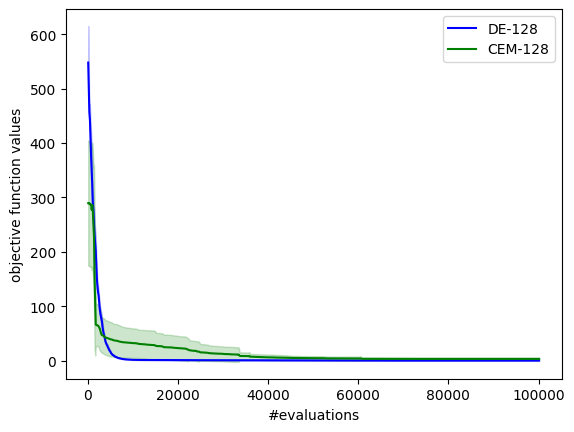

In [79]:
DE_Griewank_D10_N128_average = np.average(DE_Griewank_D10[128], axis = 0)
DE_Griewank_D10_N128_std = np.std(DE_Griewank_D10[128], axis = 0)
print(DE_Griewank_D10[128].shape, DE_Griewank_D10_N128_average.shape, DE_Griewank_D10_N128_std.shape)


CEM_Griewank_D10_N128_average = np.average(CEM_Griewank_D10[128], axis = 0)
CEM_Griewank_D10_N128_std = np.std(CEM_Griewank_D10[128], axis = 0)
print(CEM_Griewank_D10[128].shape, CEM_Griewank_D10_N128_average.shape, CEM_Griewank_D10_N128_std.shape)

fig, ax = plt.subplots()
ax.plot(DE_Griewank_D10_N128_average[:,0],DE_Griewank_D10_N128_average[:,1], color = "blue", label = 'DE-128')
ax.fill_between(DE_Griewank_D10_N128_average[:,0],
                DE_Griewank_D10_N128_average[:,1] + DE_Griewank_D10_N128_std[:,1],
                DE_Griewank_D10_N128_average[:,1] - DE_Griewank_D10_N128_std[:,1],
                alpha = 0.2, color = "blue")

ax.plot(CEM_Griewank_D10_N128_average[:,0], CEM_Griewank_D10_N128_average[:,1], color = 'green', label = 'CEM-128')
ax.fill_between(CEM_Griewank_D10_N128_average[:,0],
                CEM_Griewank_D10_N128_average[:,1] + CEM_Griewank_D10_N128_std[:,1],
                CEM_Griewank_D10_N128_average[:,1] - CEM_Griewank_D10_N128_std[:,1],
                alpha = 0.2, color = "green")

ax.legend()
ax.set_xlabel("#evaluations")
ax.set_ylabel("objective function values")

plt.show()

## Rosenbrock

### DE logs

In [80]:
## F: Hệ số scale (create_mutant_vector)
F = 0.5
## Cr: Xác suất lai ghép 
Cr = 0.7

In [81]:
DE_Rosenbrock_D2 = {}
DE_Rosenbrock_D10 = {}

In [82]:
for d in range(len(D)):
    for n in range(len(N)):
        
        result_df, result = DE_experiment (objective[2], N = N[n], D = D[d], 
                                           BL = B[2][0], BU = B[2][1],
                                           F = F, Cr = Cr,
                                           max_evaluations= max_evaluations[d])
        if D[d] == 2:
            DE_Rosenbrock_D2[N[n]] = np.array(result['best_fitness'] )
        else:
            DE_Rosenbrock_D10[N[n]] = np.array(result['best_fitness'] )

             
        print(f'$** D = {D[d]}, N = {N[n]} **$')
        result_str = result_df[['random_seed', 'best_x', 'best_fx']].to_string(index=False)
        print(result_str)

$** D = 2, N = 16 **$
 random_seed                                   best_x  best_fx
    21522490                               [1.0, 1.0] 0.000000
    21522491                               [1.0, 1.0] 0.000000
    21522492                               [1.0, 1.0] 0.000000
    21522493                               [1.0, 1.0] 0.000000
    21522494                               [1.0, 1.0] 0.000000
    21522495                               [1.0, 1.0] 0.000000
    21522496                               [1.0, 1.0] 0.000000
    21522497                               [1.0, 1.0] 0.000000
    21522498 [0.6914170952379497, 0.4780575996938098] 0.095223
    21522499                               [1.0, 1.0] 0.000000
$** D = 2, N = 32 **$
 random_seed                                   best_x  best_fx
    21522490                               [1.0, 1.0] 0.000000
    21522491                               [1.0, 1.0] 0.000000
    21522492                               [1.0, 1.0] 0.000000
    2152249

### CEM logs

In [83]:
sigma = 0.3
epsilon = 0.0001

In [84]:
CEM_Rosenbrock_D2 = {}
CEM_Rosenbrock_D10 = {}

In [85]:
for d in range(len(D)):
    for n in range(len(N)):
        
        result_df, result = CEM_experiment (objective[2], N = N[n], D = D[d], 
                                            Ne = int(N[n]/2),
                                            BL = B[2][0], BU = B[2][1],
                                            sigma = sigma, epsilon=epsilon,
                                            max_evaluations= max_evaluations[d])
        if D[d] == 2:
            CEM_Rosenbrock_D2[N[n]] = np.array(result['best_fitness'] )  
        else:
            CEM_Rosenbrock_D10[N[n]] = np.array(result['best_fitness']   )

             
        print(f'$** D = {D[d]}, N = {N[n]} **$')
        result_str = result_df[['random_seed', 'best_x', 'best_fx']].to_string(index=False)
        print(result_str)

$** D = 2, N = 16 **$
 random_seed                                   best_x  best_fx
    21522490 [0.9938443116679767, 0.9375867410314349] 0.251438
    21522491  [1.0739911431783338, 1.104475118979655] 0.245397
    21522492  [1.041427701069675, 1.0474740681174026] 0.139339
    21522493 [1.0077629031241402, 0.9746388338929649] 0.167728
    21522494 [1.0063615807595105, 0.9628353730981404] 0.249324
    21522495 [0.9790370587062541, 0.9938294719205852] 0.125161
    21522496 [0.9924147010969004, 1.0139528534241937] 0.084540
    21522497 [1.0074708724112975, 0.9644661596878967] 0.255398
    21522498 [0.9705463846837711, 0.9858533489059724] 0.193528
    21522499 [1.0329854840035626, 1.0111665840669284] 0.313484
$** D = 2, N = 32 **$
 random_seed                                   best_x  best_fx
    21522490  [1.050631973535018, 1.0357630447706239] 0.465841
    21522491 [1.0061357904469352, 0.9310274903972344] 0.660710
    21522492 [1.0113982330500366, 0.9758056328470562] 0.222166
    2152249

### Rosenbrock_D2_table

In [86]:
print(DE_Rosenbrock_D2[16].shape)
DE_Rosenbrock_D2_mean = np.array([np.average(DE_Rosenbrock_D2[n][:,-1,1], axis = 0) for n in N])

DE_Rosenbrock_D2_std = np.array([np.std(DE_Rosenbrock_D2[n][:,-1,1], axis = 0) for n in N])

print(DE_Rosenbrock_D2_mean.shape, DE_Rosenbrock_D2_std.shape)
print(DE_Rosenbrock_D2_mean)
print(DE_Rosenbrock_D2_std)

(10, 1250, 2)
(5,) (5,)
[9.52234091e-03 1.41472057e-02 0.00000000e+00 4.13120054e-19
 3.82193871e-07]
[2.85670227e-02 4.06638152e-02 0.00000000e+00 4.26487727e-19
 2.07918946e-07]


In [87]:
print(CEM_Rosenbrock_D2[16].shape)
CEM_Rosenbrock_D2_mean = np.array([np.average(CEM_Rosenbrock_D2[n][:,-1,1], axis = 0) for n in N])

CEM_Rosenbrock_D2_std = np.array([np.std(CEM_Rosenbrock_D2[n][:,-1,1], axis = 0) for n in N])

print(CEM_Rosenbrock_D2_mean.shape, CEM_Rosenbrock_D2_std.shape)
print(CEM_Rosenbrock_D2_mean)
print(CEM_Rosenbrock_D2_std)

(10, 1177, 2)
(5,) (5,)
[0.20253364 0.3773205  0.35111675 0.48473211 0.51721317]
[0.06835051 0.13048259 0.07708605 0.15864949 0.14748427]


In [141]:
Rosenbrock_D2_table = {
    'DE_mean': DE_Rosenbrock_D2_mean,
    'DE_std': DE_Rosenbrock_D2_std,
    'CEM_mean': CEM_Rosenbrock_D2_mean,
    'CEM_std': CEM_Rosenbrock_D2_std
}

df = pd.DataFrame(Rosenbrock_D2_table, index = N)

def highlight_min(s):
    """
    Highlight the minimum value in each row.
    """
    is_min = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_min]

# t_test
t_test_Rosenbrock_D2 = []

for n in N:
    print(f"Case: Rosenbrock_D2_{n}:")
    sample1 = DE_Rosenbrock_D2[n][:,-1,1]
    sample2 = CEM_Rosenbrock_D2[n][:,-1,1]

    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(sample1, sample2)

    # Print results
    print("  T-statistic:", t_statistic)
    print("  P-value:", p_value)

    # Interpret the results
    alpha = 0.05  # significance level
    if p_value < alpha:
        print("  Reject the null hypothesis: The means are significantly different.")
        t_test_Rosenbrock_D2.append(1)
        
    else:
        print("  Fail to reject the null hypothesis: The means are not significantly different.")
        t_test_Rosenbrock_D2.append(0)


df['t_test'] = t_test_Rosenbrock_D2
df


# Apply styling to each row
styled_df = df.style.apply(highlight_min, subset=['DE_mean', 'CEM_mean'], axis=1)

# Display styled DataFrame
styled_df


Case: Rosenbrock_D2_16:
  T-statistic: -7.816317612311988
  P-value: 3.406180523128935e-07
  Reject the null hypothesis: The means are significantly different.
Case: Rosenbrock_D2_32:
  T-statistic: -7.971781854461793
  P-value: 2.5771104217315404e-07
  Reject the null hypothesis: The means are significantly different.
Case: Rosenbrock_D2_64:
  T-statistic: -13.664603304420229
  P-value: 6.069767074580647e-11
  Reject the null hypothesis: The means are significantly different.
Case: Rosenbrock_D2_128:
  T-statistic: -9.166095012555424
  P-value: 3.351737969405528e-08
  Reject the null hypothesis: The means are significantly different.
Case: Rosenbrock_D2_256:
  T-statistic: -10.52070408560172
  P-value: 4.066491494409759e-09
  Reject the null hypothesis: The means are significantly different.


,DE_mean,DE_std,CEM_mean,CEM_std,t_test
16,0.009522,0.028567,0.202534,0.068351,1
32,0.014147,0.040664,0.377321,0.130483,1
64,0.000000,0.000000,0.351117,0.077086,1
128,0.000000,0.000000,0.484732,0.158649,1
256,0.000000,0.000000,0.517213,0.147484,1


### Rosenbrock_D10 table

In [89]:
print(DE_Rosenbrock_D10[16].shape)
DE_Rosenbrock_D10_mean = np.array([np.average(DE_Rosenbrock_D10[n][:,-1,1], axis = 0) for n in N])

DE_Rosenbrock_D10_std = np.array([np.std(DE_Rosenbrock_D10[n][:,-1,1], axis = 0) for n in N])

print(DE_Rosenbrock_D10_mean.shape, DE_Rosenbrock_D10_std.shape)
print(DE_Rosenbrock_D10_mean)
print(DE_Rosenbrock_D10_std)

(10, 6250, 2)
(5,) (5,)
[6.7253163  5.14744151 1.33372558 0.5337265  3.17795224]
[1.95186749 1.4527192  0.5957383  0.59513805 0.30410696]


In [90]:
print(CEM_Rosenbrock_D10[16].shape)
CEM_Rosenbrock_D10_mean = np.array([np.average(CEM_Rosenbrock_D10[n][:,-1,1], axis = 0) for n in N])

CEM_Rosenbrock_D10_std = np.array([np.std(CEM_Rosenbrock_D10[n][:,-1,1], axis = 0) for n in N])

print(CEM_Rosenbrock_D10_mean.shape, CEM_Rosenbrock_D10_std.shape)
print(CEM_Rosenbrock_D10_mean)
print(CEM_Rosenbrock_D10_std)

(10, 5883, 2)
(5,) (5,)
[2.92632244 4.12996903 3.925669   2.61561104 3.54691706]
[1.34719693 2.42438025 2.26575055 1.08068272 1.89765129]


In [142]:
Rosenbrock_D10_table = {
    'DE_mean': DE_Rosenbrock_D10_mean,
    'DE_std': DE_Rosenbrock_D10_std,
    'CEM_mean': CEM_Rosenbrock_D10_mean,
    'CEM_std': CEM_Rosenbrock_D10_std
}

df = pd.DataFrame(Rosenbrock_D10_table, index = N)

def highlight_min(s):
    """
    Highlight the minimum value in each row.
    """
    is_min = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_min]

# t_test
t_test_Rosenbrock_D10 = []

for n in N:
    print(f"Case: Rosenbrock_D10_{n}:")
    sample1 = DE_Rosenbrock_D10[n][:,-1,1]
    sample2 = CEM_Rosenbrock_D10[n][:,-1,1]

    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(sample1, sample2)

    # Print results
    print("  T-statistic:", t_statistic)
    print("  P-value:", p_value)

    # Interpret the results
    alpha = 0.05  # significance level
    if p_value < alpha:
        print("  Reject the null hypothesis: The means are significantly different.")
        t_test_Rosenbrock_D10.append(1)
        
    else:
        print("  Fail to reject the null hypothesis: The means are not significantly different.")
        t_test_Rosenbrock_D10.append(0)


df['t_test'] = t_test_Rosenbrock_D10
df


# Apply styling to each row
styled_df = df.style.apply(highlight_min, subset=['DE_mean', 'CEM_mean'], axis=1)

# Display styled DataFrame
styled_df


Case: Rosenbrock_D10_16:
  T-statistic: 4.8055062988999255
  P-value: 0.0001416848449869939
  Reject the null hypothesis: The means are significantly different.
Case: Rosenbrock_D10_32:
  T-statistic: 1.0800019806916896
  P-value: 0.29440048542774105
  Fail to reject the null hypothesis: The means are not significantly different.
Case: Rosenbrock_D10_64:
  T-statistic: -3.3190879782164875
  P-value: 0.003816987312655343
  Reject the null hypothesis: The means are significantly different.
Case: Rosenbrock_D10_128:
  T-statistic: -5.062457338272986
  P-value: 8.111855156325268e-05
  Reject the null hypothesis: The means are significantly different.
Case: Rosenbrock_D10_256:
  T-statistic: -0.5759483681884293
  P-value: 0.571781609301118
  Fail to reject the null hypothesis: The means are not significantly different.


,DE_mean,DE_std,CEM_mean,CEM_std,t_test
16,6.725316,1.951867,2.926322,1.347197,1
32,5.147442,1.452719,4.129969,2.424380,0
64,1.333726,0.595738,3.925669,2.265751,1
128,0.533727,0.595138,2.615611,1.080683,1
256,3.177952,0.304107,3.546917,1.897651,0


### Plot: D = 2, N = 128

(10, 157, 2) (157, 2) (157, 2)
(10, 156, 2) (156, 2) (156, 2)


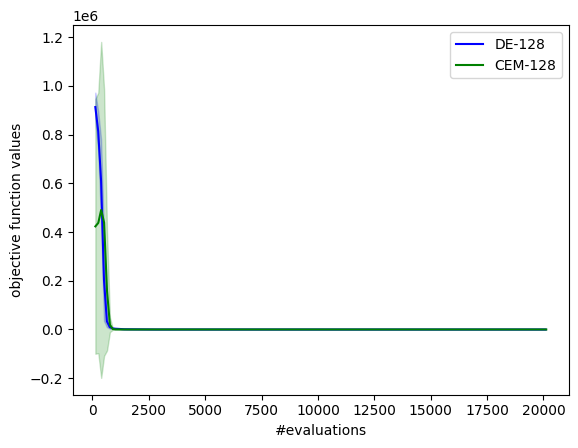

In [92]:
DE_Rosenbrock_D2_N128_average = np.average(DE_Rosenbrock_D2[128], axis = 0)
DE_Rosenbrock_D2_N128_std = np.std(DE_Rosenbrock_D2[128], axis = 0)
print(DE_Rosenbrock_D2[128].shape, DE_Rosenbrock_D2_N128_average.shape, DE_Rosenbrock_D2_N128_std.shape)


CEM_Rosenbrock_D2_N128_average = np.average(CEM_Rosenbrock_D2[128], axis = 0)
CEM_Rosenbrock_D2_N128_std = np.std(CEM_Rosenbrock_D2[128], axis = 0)
print(CEM_Rosenbrock_D2[128].shape, CEM_Rosenbrock_D2_N128_average.shape, CEM_Rosenbrock_D2_N128_std.shape)

fig, ax = plt.subplots()
ax.plot(DE_Rosenbrock_D2_N128_average[:,0],DE_Rosenbrock_D2_N128_average[:,1], color = "blue", label = 'DE-128')
ax.fill_between(DE_Rosenbrock_D2_N128_average[:,0],
                DE_Rosenbrock_D2_N128_average[:,1] + DE_Rosenbrock_D2_N128_std[:,1],
                DE_Rosenbrock_D2_N128_average[:,1] - DE_Rosenbrock_D2_N128_std[:,1],
                alpha = 0.2, color = "blue")

ax.plot(CEM_Rosenbrock_D2_N128_average[:,0], CEM_Rosenbrock_D2_N128_average[:,1], color = 'green', label = 'CEM-128')
ax.fill_between(CEM_Rosenbrock_D2_N128_average[:,0],
                CEM_Rosenbrock_D2_N128_average[:,1] + CEM_Rosenbrock_D2_N128_std[:,1],
                CEM_Rosenbrock_D2_N128_average[:,1] - CEM_Rosenbrock_D2_N128_std[:,1],
                alpha = 0.2, color = "green")

ax.legend()
ax.set_xlabel("#evaluations")
ax.set_ylabel("objective function values")

plt.show()

### Plot: D = 10, N = 128

(10, 782, 2) (782, 2) (782, 2)
(10, 776, 2) (776, 2) (776, 2)


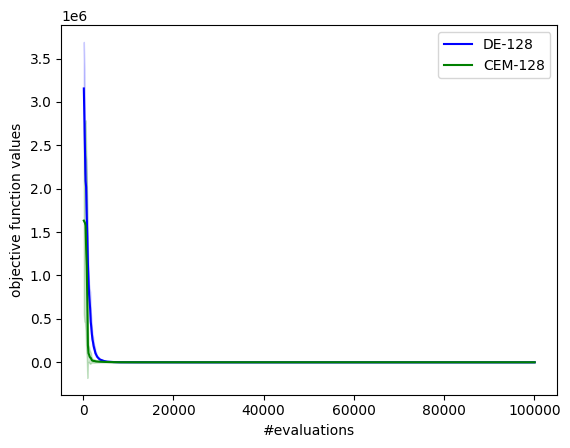

In [93]:
DE_Rosenbrock_D10_N128_average = np.average(DE_Rosenbrock_D10[128], axis = 0)
DE_Rosenbrock_D10_N128_std = np.std(DE_Rosenbrock_D10[128], axis = 0)
print(DE_Rosenbrock_D10[128].shape, DE_Rosenbrock_D10_N128_average.shape, DE_Rosenbrock_D10_N128_std.shape)


CEM_Rosenbrock_D10_N128_average = np.average(CEM_Rosenbrock_D10[128], axis = 0)
CEM_Rosenbrock_D10_N128_std = np.std(CEM_Rosenbrock_D10[128], axis = 0)
print(CEM_Rosenbrock_D10[128].shape, CEM_Rosenbrock_D10_N128_average.shape, CEM_Rosenbrock_D10_N128_std.shape)

fig, ax = plt.subplots()
ax.plot(DE_Rosenbrock_D10_N128_average[:,0],DE_Rosenbrock_D10_N128_average[:,1], color = "blue", label = 'DE-128')
ax.fill_between(DE_Rosenbrock_D10_N128_average[:,0],
                DE_Rosenbrock_D10_N128_average[:,1] + DE_Rosenbrock_D10_N128_std[:,1],
                DE_Rosenbrock_D10_N128_average[:,1] - DE_Rosenbrock_D10_N128_std[:,1],
                alpha = 0.2, color = "blue")

ax.plot(CEM_Rosenbrock_D10_N128_average[:,0], CEM_Rosenbrock_D10_N128_average[:,1], color = 'green', label = 'CEM-128')
ax.fill_between(CEM_Rosenbrock_D10_N128_average[:,0],
                CEM_Rosenbrock_D10_N128_average[:,1] + CEM_Rosenbrock_D10_N128_std[:,1],
                CEM_Rosenbrock_D10_N128_average[:,1] - CEM_Rosenbrock_D10_N128_std[:,1],
                alpha = 0.2, color = "green")

ax.legend()
ax.set_xlabel("#evaluations")
ax.set_ylabel("objective function values")

plt.show()

## Michalewicz

### DE logs

In [94]:
## F: Hệ số scale (create_mutant_vector)
F = 0.5
## Cr: Xác suất lai ghép 
Cr = 0.7

In [95]:
DE_Michalewicz_D2 = {}
DE_Michalewicz_D10 = {}

In [96]:
for d in range(len(D)):
    for n in range(len(N)):
        
        result_df, result = DE_experiment (objective[3], N = N[n], D = D[d], 
                                           BL = B[3][0], BU = B[3][1],
                                           F = F, Cr = Cr,
                                           max_evaluations= max_evaluations[d])
        if D[d] == 2:
            DE_Michalewicz_D2[N[n]] = np.array(result['best_fitness'])
        else:
            DE_Michalewicz_D10[N[n]] = np.array(result['best_fitness'] )

             
        print(f'$** D = {D[d]}, N = {N[n]} **$')
        result_str = result_df[['random_seed', 'best_x', 'best_fx']].to_string(index=False)
        print(result_str)

$** D = 2, N = 16 **$
 random_seed                                   best_x   best_fx
    21522490 [2.2029055193953475, 1.5707963239053573] -1.801303
    21522491   [2.202905520663724, 1.570796326682225] -1.801303
    21522492 [2.2029055202377483, 1.5707963280121624] -1.801303
    21522493   [2.20290552027469, 1.5707963297074508] -1.801303
    21522494    [2.2029055195614, 1.5707963285427957] -1.801303
    21522495 [2.2029055202849475, 1.5707963247071148] -1.801303
    21522496 [2.2029055204063304, 1.5707963300145524] -1.801303
    21522497 [2.2029055202446726, 1.5707963278277912] -1.801303
    21522498 [2.2029055207774184, 1.5707963248835348] -1.801303
    21522499 [2.2029055208399857, 1.5707963257445328] -1.801303
$** D = 2, N = 32 **$
 random_seed                                   best_x   best_fx
    21522490  [2.202905520058372, 1.5707963300331287] -1.801303
    21522491 [2.2029055205179713, 1.5707963234022992] -1.801303
    21522492    [2.20290551955992, 1.570796329499332] -1.801

### CEM logs

In [97]:
sigma = 0.75
epsilon = 0.0001

In [98]:
CEM_Michalewicz_D2 = {}
CEM_Michalewicz_D10 = {}

In [99]:
for d in range(len(D)):
    for n in range(len(N)):
        
        result_df, result = CEM_experiment (objective[3], N = N[n], D = D[d], 
                                 Ne = int(N[n]/2),
                                BL = B[3][0], BU = B[3][1],
                                sigma = sigma, epsilon=epsilon,
                                max_evaluations= max_evaluations[d])
        if D[d] == 2:
            CEM_Michalewicz_D2[N[n]] = np.array(result['best_fitness']  )
        else:
            CEM_Michalewicz_D10[N[n]] = np.array(result['best_fitness'] )

             
        print(f'$** D = {D[d]}, N = {N[n]} **$')
        result_str = result_df[['random_seed', 'best_x', 'best_fx']].to_string(index=False)
        print(result_str)

$** D = 2, N = 16 **$
 random_seed                                   best_x   best_fx
    21522490  [2.212279284587498, 1.5497204668060711] -1.782270
    21522491 [2.2090536712457696, 1.5366649955226042] -1.755531
    21522492  [2.174389152115383, 1.5574358768503436] -1.781209
    21522493 [2.1879577056138957, 1.5467222501733102] -1.774842
    21522494 [2.2106559802524544, 1.5950868181234148] -1.776344
    21522495   [2.23458181888119, 2.6988294530173444] -1.189639
    21522496  [2.2185250412374247, 1.560554990293794] -1.793109
    21522497  [2.167603249907153, 1.5584343082680847] -1.775474
    21522498 [2.2219478447190553, 1.5936087124994234] -1.774222
    21522499 [2.1792593374419624, 1.5939767250577686] -1.770512
$** D = 2, N = 32 **$
 random_seed                                   best_x   best_fx
    21522490 [2.2027615425743545, 1.5383645451272898] -1.760400
    21522491   [2.186310520746929, 1.536289314442386] -1.750749
    21522492  [2.217011259685177, 2.6871063097303094] -1.181

### Michalewicz_D2 table

In [100]:
print(DE_Michalewicz_D2[16].shape)
DE_Michalewicz_D2_mean = np.array([np.average(DE_Michalewicz_D2[n][:,-1,1], axis = 0) for n in N])

DE_Michalewicz_D2_std = np.array([np.std(DE_Michalewicz_D2[n][:,-1,1], axis = 0) for n in N])

print(DE_Michalewicz_D2_mean.shape, DE_Michalewicz_D2_std.shape)
print(DE_Michalewicz_D2_mean)
print(DE_Michalewicz_D2_std)

(10, 1250, 2)
(5,) (5,)
[-1.80130341 -1.80130341 -1.80130341 -1.80130341 -1.80130341]
[2.22044605e-16 2.22044605e-16 2.22044605e-16 4.44089210e-16
 1.07569692e-13]


In [101]:
print(CEM_Michalewicz_D2[16].shape)
CEM_Michalewicz_D2_mean = np.array([np.average(CEM_Michalewicz_D2[n][:,-1,1], axis = 0) for n in N])

CEM_Michalewicz_D2_std = np.array([np.std(CEM_Michalewicz_D2[n][:,-1,1], axis = 0) for n in N])

print(CEM_Michalewicz_D2_mean.shape, CEM_Michalewicz_D2_std.shape)
print(CEM_Michalewicz_D2_mean)
print(CEM_Michalewicz_D2_std)

(10, 1177, 2)
(5,) (5,)
[-1.71731518 -1.70674409 -1.76896697 -1.75615337 -1.7542562 ]
[0.17612305 0.17504026 0.00819712 0.01455027 0.01253521]


In [143]:
Michalewicz_D2_table = {
    'DE_mean': DE_Michalewicz_D2_mean,
    'DE_std': DE_Michalewicz_D2_std,
    'CEM_mean': CEM_Michalewicz_D2_mean,
    'CEM_std': CEM_Michalewicz_D2_std
}

df = pd.DataFrame(Michalewicz_D2_table, index = N)

def highlight_min(s):
    """
    Highlight the minimum value in each row.
    """
    is_min = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_min]

# t_test
t_test_Michalewicz_D2 = []

for n in N:
    print(f"Case: Michalewicz_D2_{n}:")
    sample1 = DE_Michalewicz_D2[n][:,-1,1]
    sample2 = CEM_Michalewicz_D2[n][:,-1,1]

    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(sample1, sample2)

    # Print results
    print("  T-statistic:", t_statistic)
    print("  P-value:", p_value)

    # Interpret the results
    alpha = 0.05  # significance level
    if p_value < alpha:
        print("  Reject the null hypothesis: The means are significantly different.")
        t_test_Michalewicz_D2.append(1)
        
    else:
        print("  Fail to reject the null hypothesis: The means are not significantly different.")
        t_test_Michalewicz_D2.append(0)


df['t_test'] = t_test_Michalewicz_D2
df


# Apply styling to each row
styled_df = df.style.apply(highlight_min, subset=['DE_mean', 'CEM_mean'], axis=1)

# Display styled DataFrame
styled_df


Case: Michalewicz_D2_16:
  T-statistic: -1.4306174101083888
  P-value: 0.16967136608004946
  Fail to reject the null hypothesis: The means are not significantly different.
Case: Michalewicz_D2_32:
  T-statistic: -1.6206440763991923
  P-value: 0.12248001171825866
  Fail to reject the null hypothesis: The means are not significantly different.
Case: Michalewicz_D2_64:
  T-statistic: -11.834558246079919
  P-value: 6.308300354956555e-10
  Reject the null hypothesis: The means are significantly different.
Case: Michalewicz_D2_128:
  T-statistic: -9.309114358312845
  P-value: 2.656357992611772e-08
  Reject the null hypothesis: The means are significantly different.
Case: Michalewicz_D2_256:
  T-statistic: -11.259619425436266
  P-value: 1.3969154085301836e-09
  Reject the null hypothesis: The means are significantly different.


/Users/HongQuan/anaconda3/envs/LearnPytorch/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,DE_mean,DE_std,CEM_mean,CEM_std,t_test
16,-1.801303,0.000000,-1.717315,0.176123,0
32,-1.801303,0.000000,-1.706744,0.175040,0
64,-1.801303,0.000000,-1.768967,0.008197,1
128,-1.801303,0.000000,-1.756153,0.014550,1
256,-1.801303,0.000000,-1.754256,0.012535,1


### Michalewicz_D10 table

In [103]:
print(DE_Michalewicz_D10[16].shape)
DE_Michalewicz_D10_mean = np.array([np.average(DE_Michalewicz_D10[n][:,-1,1], axis = 0) for n in N])

DE_Michalewicz_D10_std = np.array([np.std(DE_Michalewicz_D10[n][:,-1,1], axis = 0) for n in N])

print(DE_Michalewicz_D10_mean.shape, DE_Michalewicz_D10_std.shape)
print(DE_Michalewicz_D10_mean)
print(DE_Michalewicz_D10_std)

(10, 6250, 2)
(5,) (5,)
[-9.58258755 -9.65248921 -9.65597543 -8.39099083 -6.02699893]
[0.08421578 0.02919637 0.01252884 0.41226396 0.16931034]


In [104]:
print(CEM_Michalewicz_D10[16].shape)
CEM_Michalewicz_D10_mean = np.array([np.average(CEM_Michalewicz_D10[n][:,-1,1], axis = 0) for n in N])

CEM_Michalewicz_D10_std = np.array([np.std(CEM_Michalewicz_D10[n][:,-1,1], axis = 0) for n in N])

print(CEM_Michalewicz_D10_mean.shape, CEM_Michalewicz_D10_std.shape)
print(CEM_Michalewicz_D10_mean)
print(CEM_Michalewicz_D10_std)

(10, 5883, 2)
(5,) (5,)
[-5.97854461 -5.9986505  -6.7480185  -7.24423708 -7.95402402]
[0.91245426 0.96702182 0.77646243 0.25562516 0.15706614]


In [144]:
Michalewicz_D10_table = {
    'DE_mean': DE_Michalewicz_D10_mean,
    'DE_std': DE_Michalewicz_D10_std,
    'CEM_mean': CEM_Michalewicz_D10_mean,
    'CEM_std': CEM_Michalewicz_D10_std
}

df = pd.DataFrame(Michalewicz_D10_table, index = N)

def highlight_min(s):
    """
    Highlight the minimum value in each row.
    """
    is_min = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_min]

# t_test
t_test_Michalewicz_D10 = []

for n in N:
    print(f"Case: Michalewicz_D10_{n}:")
    sample1 = DE_Michalewicz_D10[n][:,-1,1]
    sample2 = CEM_Michalewicz_D10[n][:,-1,1]

    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(sample1, sample2)

    # Print results
    print("  T-statistic:", t_statistic)
    print("  P-value:", p_value)

    # Interpret the results
    alpha = 0.05  # significance level
    if p_value < alpha:
        print("  Reject the null hypothesis: The means are significantly different.")
        t_test_Michalewicz_D10.append(1)
        
    else:
        print("  Fail to reject the null hypothesis: The means are not significantly different.")
        t_test_Michalewicz_D10.append(0)


df['t_test'] = t_test_Michalewicz_D10
df


# Apply styling to each row
styled_df = df.style.apply(highlight_min, subset=['DE_mean', 'CEM_mean'], axis=1)

# Display styled DataFrame
styled_df


Case: Michalewicz_D10_16:
  T-statistic: -11.799352247111631
  P-value: 6.61720326631618e-10
  Reject the null hypothesis: The means are significantly different.
Case: Michalewicz_D10_32:
  T-statistic: -11.330171998322434
  P-value: 1.2649675604405937e-09
  Reject the null hypothesis: The means are significantly different.
Case: Michalewicz_D10_64:
  T-statistic: -11.233943836169678
  P-value: 1.448448475022177e-09
  Reject the null hypothesis: The means are significantly different.
Case: Michalewicz_D10_128:
  T-statistic: -7.092104376891569
  P-value: 1.3031845002946194e-06
  Reject the null hypothesis: The means are significantly different.
Case: Michalewicz_D10_256:
  T-statistic: 25.032219985643703
  P-value: 1.9389648011120183e-15
  Reject the null hypothesis: The means are significantly different.


,DE_mean,DE_std,CEM_mean,CEM_std,t_test
16,-9.582588,0.084216,-5.978545,0.912454,1
32,-9.652489,0.029196,-5.998650,0.967022,1
64,-9.655975,0.012529,-6.748018,0.776462,1
128,-8.390991,0.412264,-7.244237,0.255625,1
256,-6.026999,0.169310,-7.954024,0.157066,1


### Plot: D = 2, N = 128

(10, 157, 2) (157, 2) (157, 2)
(10, 156, 2) (156, 2) (156, 2)


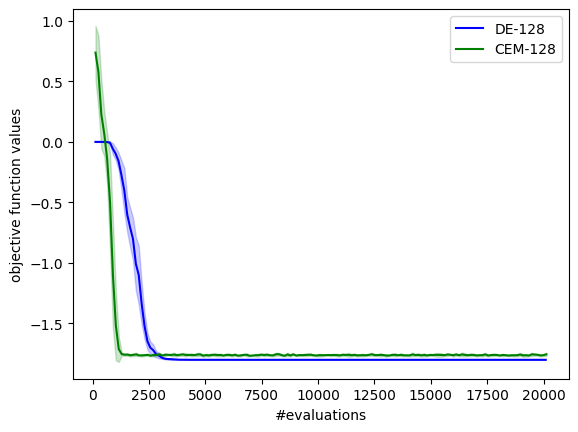

In [106]:
DE_Michalewicz_D2_N128_average = np.average(DE_Michalewicz_D2[128], axis = 0)
DE_Michalewicz_D2_N128_std = np.std(DE_Michalewicz_D2[128], axis = 0)
print(DE_Michalewicz_D2[128].shape, DE_Michalewicz_D2_N128_average.shape, DE_Michalewicz_D2_N128_std.shape)


CEM_Michalewicz_D2_N128_average = np.average(CEM_Michalewicz_D2[128], axis = 0)
CEM_Michalewicz_D2_N128_std = np.std(CEM_Michalewicz_D2[128], axis = 0)
print(CEM_Michalewicz_D2[128].shape, CEM_Michalewicz_D2_N128_average.shape, CEM_Michalewicz_D2_N128_std.shape)

fig, ax = plt.subplots()
ax.plot(DE_Michalewicz_D2_N128_average[:,0],DE_Michalewicz_D2_N128_average[:,1], color = "blue", label = 'DE-128')
ax.fill_between(DE_Michalewicz_D2_N128_average[:,0],
                DE_Michalewicz_D2_N128_average[:,1] + DE_Michalewicz_D2_N128_std[:,1],
                DE_Michalewicz_D2_N128_average[:,1] - DE_Michalewicz_D2_N128_std[:,1],
                alpha = 0.2, color = "blue")

ax.plot(CEM_Michalewicz_D2_N128_average[:,0], CEM_Michalewicz_D2_N128_average[:,1], color = 'green', label = 'CEM-128')
ax.fill_between(CEM_Michalewicz_D2_N128_average[:,0],
                CEM_Michalewicz_D2_N128_average[:,1] + CEM_Michalewicz_D2_N128_std[:,1],
                CEM_Michalewicz_D2_N128_average[:,1] - CEM_Michalewicz_D2_N128_std[:,1],
                alpha = 0.2, color = "green")

ax.legend()
ax.set_xlabel("#evaluations")
ax.set_ylabel("objective function values")

plt.show()

### Plot: D = 10, N = 128

(10, 782, 2) (782, 2) (782, 2)
(10, 776, 2) (776, 2) (776, 2)


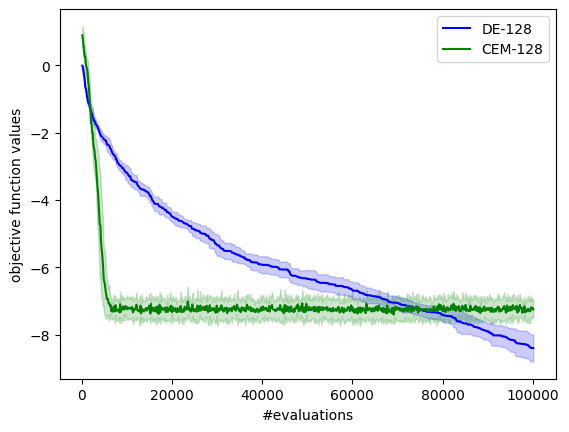

In [107]:
DE_Michalewicz_D10_N128_average = np.average(DE_Michalewicz_D10[128], axis = 0)
DE_Michalewicz_D10_N128_std = np.std(DE_Michalewicz_D10[128], axis = 0)
print(DE_Michalewicz_D10[128].shape, DE_Michalewicz_D10_N128_average.shape, DE_Michalewicz_D10_N128_std.shape)


CEM_Michalewicz_D10_N128_average = np.average(CEM_Michalewicz_D10[128], axis = 0)
CEM_Michalewicz_D10_N128_std = np.std(CEM_Michalewicz_D10[128], axis = 0)
print(CEM_Michalewicz_D10[128].shape, CEM_Michalewicz_D10_N128_average.shape, CEM_Michalewicz_D10_N128_std.shape)

fig, ax = plt.subplots()
ax.plot(DE_Michalewicz_D10_N128_average[:,0],DE_Michalewicz_D10_N128_average[:,1], color = "blue", label = 'DE-128')
ax.fill_between(DE_Michalewicz_D10_N128_average[:,0],
                DE_Michalewicz_D10_N128_average[:,1] + DE_Michalewicz_D10_N128_std[:,1],
                DE_Michalewicz_D10_N128_average[:,1] - DE_Michalewicz_D10_N128_std[:,1],
                alpha = 0.2, color = "blue")

ax.plot(CEM_Michalewicz_D10_N128_average[:,0], CEM_Michalewicz_D10_N128_average[:,1], color = 'green', label = 'CEM-128')
ax.fill_between(CEM_Michalewicz_D10_N128_average[:,0],
                CEM_Michalewicz_D10_N128_average[:,1] + CEM_Michalewicz_D10_N128_std[:,1],
                CEM_Michalewicz_D10_N128_average[:,1] - CEM_Michalewicz_D10_N128_std[:,1],
                alpha = 0.2, color = "green")

ax.legend()
ax.set_xlabel("#evaluations")
ax.set_ylabel("objective function values")

plt.show()

## Ackley

### DE logs

In [108]:
## F: Hệ số scale (create_mutant_vector)
F = 0.5
## Cr: Xác suất lai ghép 
Cr = 0.7

In [109]:
DE_Ackley_D2 = {}
DE_Ackley_D10 = {}

In [110]:
for d in range(len(D)):
    for n in range(len(N)):
        
        result_df, result = DE_experiment (objective[4], N = N[n], D = D[d], 
                                           BL = B[4][0], BU = B[4][1],
                                           F = F, Cr = Cr,
                                           max_evaluations= max_evaluations[d])
        if D[d] == 2:
            DE_Ackley_D2[N[n]] = np.array(result['best_fitness']  ) 
        else:
            DE_Ackley_D10[N[n]] = np.array(result['best_fitness']   )

             
        print(f'$** D = {D[d]}, N = {N[n]} **$')
        result_str = result_df[['random_seed', 'best_x', 'best_fx']].to_string(index=False)
        print(result_str)

$** D = 2, N = 16 **$
 random_seed                                             best_x      best_fx
    21522490  [-2.5800380122761716e-16, 2.8709795666574493e-16] 4.440892e-16
    21522491   [1.563561301632771e-16, -3.5388973574629004e-16] 4.440892e-16
    21522492    [-9.830981300072088e-17, 2.843237104697476e-16] 4.440892e-16
    21522493     [4.673688832297087e-17, 2.472315526771953e-16] 4.440892e-16
    21522494    [3.5625621277161554e-16, 6.010309734765857e-17] 4.440892e-16
    21522495 [-2.3056532686762925e-17, -1.7334728499772477e-16] 4.440892e-16
    21522496  [-8.200415975578355e-17, -1.4086633903814503e-16] 4.440892e-16
    21522497    [2.9585350231582635e-16, 8.560162865845666e-17] 4.440892e-16
    21522498     [7.4257348267384e-17, -1.7727103803773673e-16] 4.440892e-16
    21522499  [-2.4985758762778755e-16, -2.593166178598085e-16] 4.440892e-16
$** D = 2, N = 32 **$
 random_seed                                            best_x      best_fx
    21522490  [1.9654433256287916

### CEM logs

In [111]:
sigma = 7.24
epsilon = 0.0001

In [112]:
CEM_Ackley_D2 = {}
CEM_Ackley_D10 = {}

In [113]:
for d in range(len(D)):
    for n in range(len(N)):
        
        result_df, result = CEM_experiment (objective[4], N = N[n], D = D[d], 
                                            Ne = int(N[n]/2),
                                            BL = B[4][0], BU = B[4][1],
                                            sigma = sigma, epsilon=epsilon,
                                            max_evaluations= max_evaluations[d])
        if D[d] == 2:
            CEM_Ackley_D2[N[n]] = np.array(result['best_fitness'])   
        else:
            CEM_Ackley_D10[N[n]] = np.array(result['best_fitness'])  

             
        print(f'$** D = {D[d]}, N = {N[n]} **$')
        result_str = result_df[['random_seed', 'best_x', 'best_fx']].to_string(index=False)
        print(result_str)

$** D = 2, N = 16 **$
 random_seed                                        best_x   best_fx
    21522490      [-21.02417384800891, -14.99181525917225] 19.498484
    21522491 [-0.017811328915148777, -0.03144916729530406]  0.136693
    21522492        [32.0086154656314, 27.974943549276265] 19.969746
    21522493 [0.0024561008328062347, -0.03544969046512536]  0.133784
    21522494 [-0.013429473893582296, 0.017838984468426716]  0.076388
    21522495       [3.0050328527392596, 5.952408315255592] 12.271072
    21522496      [-6.977294706004718, -7.978732785296766] 15.558517
    21522497     [-2.0355661792508815, 21.997385524366763] 19.154318
    21522498     [11.019217854083212, -29.015086966949077] 19.767764
    21522499     [11.019065110295204, -6.9812992676162295] 16.857803
$** D = 2, N = 32 **$
 random_seed                                          best_x   best_fx
    21522490       [-4.030871815507706, -17.000849597919284] 18.335279
    21522491    [-0.03762777321891415, 0.00109703717188

### Ackley_D2 table

In [114]:
print(DE_Ackley_D2[16].shape)
DE_Ackley_D2_mean = np.array([np.average(DE_Ackley_D2[n][:,-1,1], axis = 0) for n in N])

DE_Ackley_D2_std = np.array([np.std(DE_Ackley_D2[n][:,-1,1], axis = 0) for n in N])

print(DE_Ackley_D2_mean.shape, DE_Ackley_D2_std.shape)
print(DE_Ackley_D2_mean)
print(DE_Ackley_D2_std)

(10, 1250, 2)
(5,) (5,)
[4.44089210e-16 4.44089210e-16 4.44089210e-16 1.25233157e-14
 2.05469369e-06]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 8.28628102e-15
 6.74139277e-07]


In [115]:
print(CEM_Ackley_D2[16].shape)
CEM_Ackley_D2_mean = np.array([np.average(CEM_Ackley_D2[n][:,-1,1], axis = 0) for n in N])

CEM_Ackley_D2_std = np.array([np.std(CEM_Ackley_D2[n][:,-1,1], axis = 0) for n in N])

print(CEM_Ackley_D2_mean.shape, CEM_Ackley_D2_std.shape)
print(CEM_Ackley_D2_mean)
print(CEM_Ackley_D2_std)

(10, 1177, 2)
(5,) (5,)
[12.34245684  7.07466633  4.08005498  2.07754111  0.1506922 ]
[8.30750388 8.63438697 7.92824281 5.79703114 0.01834218]


In [145]:
Ackley_D2_table = {
    'DE_mean': DE_Ackley_D2_mean,
    'DE_std': DE_Ackley_D2_std,
    'CEM_mean': CEM_Ackley_D2_mean,
    'CEM_std': CEM_Ackley_D2_std
}

df = pd.DataFrame(Ackley_D2_table, index = N)

def highlight_min(s):
    """
    Highlight the minimum value in each row.
    """
    is_min = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_min]

# t_test
t_test_Ackley_D2 = []

for n in N:
    print(f"Case: Ackley_D2_{n}:")
    sample1 = DE_Ackley_D2[n][:,-1,1]
    sample2 = CEM_Ackley_D2[n][:,-1,1]

    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(sample1, sample2)

    # Print results
    print("  T-statistic:", t_statistic)
    print("  P-value:", p_value)

    # Interpret the results
    alpha = 0.05  # significance level
    if p_value < alpha:
        print("  Reject the null hypothesis: The means are significantly different.")
        t_test_Ackley_D2.append(1)
        
    else:
        print("  Fail to reject the null hypothesis: The means are not significantly different.")
        t_test_Ackley_D2.append(0)


df['t_test'] = t_test_Ackley_D2
df


# Apply styling to each row
styled_df = df.style.apply(highlight_min, subset=['DE_mean', 'CEM_mean'], axis=1)

# Display styled DataFrame
styled_df


Case: Ackley_D2_16:
  T-statistic: -4.457099392873088
  P-value: 0.00030450736157160813
  Reject the null hypothesis: The means are significantly different.
Case: Ackley_D2_32:
  T-statistic: -2.458078268219924
  P-value: 0.024333747699833166
  Reject the null hypothesis: The means are significantly different.
Case: Ackley_D2_64:
  T-statistic: -1.543868575901559
  P-value: 0.14001898611716546
  Fail to reject the null hypothesis: The means are not significantly different.
Case: Ackley_D2_128:
  T-statistic: -1.0751405625528543
  P-value: 0.2965127880332413
  Fail to reject the null hypothesis: The means are not significantly different.
Case: Ackley_D2_256:
  T-statistic: -24.64649475712587
  P-value: 2.545046662115407e-15
  Reject the null hypothesis: The means are significantly different.


/Users/HongQuan/anaconda3/envs/LearnPytorch/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,DE_mean,DE_std,CEM_mean,CEM_std,t_test
16,0.000000,0.000000,12.342457,8.307504,1
32,0.000000,0.000000,7.074666,8.634387,1
64,0.000000,0.000000,4.080055,7.928243,0
128,0.000000,0.000000,2.077541,5.797031,0
256,0.000002,0.000001,0.150692,0.018342,1


### Ackley_D10 table

In [117]:
print(DE_Ackley_D10[16].shape)
DE_Ackley_D10_mean = np.array([np.average(DE_Ackley_D10[n][:,-1,1], axis = 0) for n in N])

DE_Ackley_D10_std = np.array([np.std(DE_Ackley_D10[n][:,-1,1], axis = 0) for n in N])

print(DE_Ackley_D10_mean.shape, DE_Ackley_D10_std.shape)
print(DE_Ackley_D10_mean)
print(DE_Ackley_D10_std)

(10, 6250, 2)
(5,) (5,)
[1.15636406e-01 3.99680289e-15 3.99680289e-15 7.54951657e-15
 7.26964242e-07]
[3.46504222e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.51554668e-07]


In [122]:
print(CEM_Ackley_D10[16].shape)
CEM_Ackley_D10_mean = np.array([np.average(CEM_Ackley_D10[n][:,-1,1], axis = 0) for n in N])

CEM_Ackley_D10_std = np.array([np.std(CEM_Ackley_D10[n][:,-1,1], axis = 0) for n in N])

print(CEM_Ackley_D10_mean.shape, CEM_Ackley_D10_std.shape)
print(CEM_Ackley_D10_mean)
print(CEM_Ackley_D10_std)

(10, 5883, 2)
(5,) (5,)
[18.06731794 17.75438247 16.44190726 11.48125892  4.10929276]
[2.09586377 2.5046493  3.16187723 5.73584325 5.55067537]


In [146]:
Ackley_D10_table = {
    'DE_mean': DE_Ackley_D10_mean,
    'DE_std': DE_Ackley_D10_std,
    'CEM_mean': CEM_Ackley_D10_mean,
    'CEM_std': CEM_Ackley_D10_std
}

df = pd.DataFrame(Ackley_D10_table, index = N)

def highlight_min(s):
    """
    Highlight the minimum value in each row.
    """
    is_min = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_min]

# t_test
t_test_Ackley_D10 = []

for n in N:
    print(f"Case: Ackley_D10_{n}:")
    sample1 = DE_Ackley_D10[n][:,-1,1]
    sample2 = CEM_Ackley_D10[n][:,-1,1]

    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(sample1, sample2)

    # Print results
    print("  T-statistic:", t_statistic)
    print("  P-value:", p_value)

    # Interpret the results
    alpha = 0.05  # significance level
    if p_value < alpha:
        print("  Reject the null hypothesis: The means are significantly different.")
        t_test_Ackley_D10.append(1)
        
    else:
        print("  Fail to reject the null hypothesis: The means are not significantly different.")
        t_test_Ackley_D10.append(0)


df['t_test'] = t_test_Ackley_D10
df


# Apply styling to each row
styled_df = df.style.apply(highlight_min, subset=['DE_mean', 'CEM_mean'], axis=1)

# Display styled DataFrame
styled_df


Case: Ackley_D10_16:
  T-statistic: -25.3517341078238
  P-value: 1.552454222478923e-15
  Reject the null hypothesis: The means are significantly different.
Case: Ackley_D10_32:
  T-statistic: -21.2657106826101
  P-value: 3.330778886789644e-14
  Reject the null hypothesis: The means are significantly different.
Case: Ackley_D10_64:
  T-statistic: -15.600138185282026
  P-value: 6.674406473064694e-12
  Reject the null hypothesis: The means are significantly different.
Case: Ackley_D10_128:
  T-statistic: -6.005006628838835
  P-value: 1.1155020345952127e-05
  Reject the null hypothesis: The means are significantly different.
Case: Ackley_D10_256:
  T-statistic: -2.220968671658834
  P-value: 0.039423445110159404
  Reject the null hypothesis: The means are significantly different.


/Users/HongQuan/anaconda3/envs/LearnPytorch/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,DE_mean,DE_std,CEM_mean,CEM_std,t_test
16,0.115636,0.346504,18.067318,2.095864,1
32,0.000000,0.000000,17.754382,2.504649,1
64,0.000000,0.000000,16.441907,3.161877,1
128,0.000000,0.000000,11.481259,5.735843,1
256,0.000001,0.000000,4.109293,5.550675,1


### Plot: D = 2, N = 128

(10, 157, 2) (157, 2) (157, 2)
(10, 156, 2) (156, 2) (156, 2)


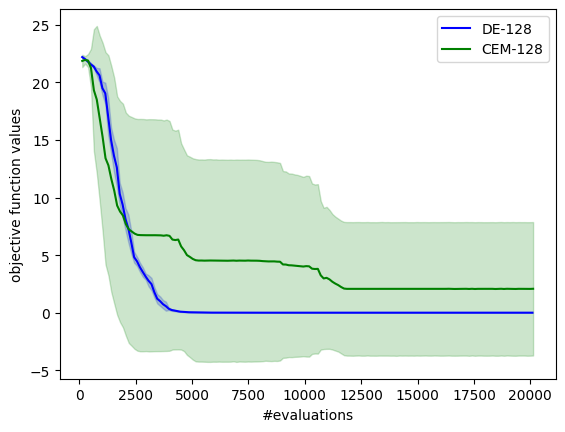

In [120]:
DE_Ackley_D2_N128_average = np.average(DE_Ackley_D2[128], axis = 0)
DE_Ackley_D2_N128_std = np.std(DE_Ackley_D2[128], axis = 0)
print(DE_Ackley_D2[128].shape, DE_Ackley_D2_N128_average.shape, DE_Ackley_D2_N128_std.shape)


CEM_Ackley_D2_N128_average = np.average(CEM_Ackley_D2[128], axis = 0)
CEM_Ackley_D2_N128_std = np.std(CEM_Ackley_D2[128], axis = 0)
print(CEM_Ackley_D2[128].shape, CEM_Ackley_D2_N128_average.shape, CEM_Ackley_D2_N128_std.shape)

fig, ax = plt.subplots()
ax.plot(DE_Ackley_D2_N128_average[:,0],DE_Ackley_D2_N128_average[:,1], color = "blue", label = 'DE-128')
ax.fill_between(DE_Ackley_D2_N128_average[:,0],
                DE_Ackley_D2_N128_average[:,1] + DE_Ackley_D2_N128_std[:,1],
                DE_Ackley_D2_N128_average[:,1] - DE_Ackley_D2_N128_std[:,1],
                alpha = 0.2, color = "blue")

ax.plot(CEM_Ackley_D2_N128_average[:,0], CEM_Ackley_D2_N128_average[:,1], color = 'green', label = 'CEM-128')
ax.fill_between(CEM_Ackley_D2_N128_average[:,0],
                CEM_Ackley_D2_N128_average[:,1] + CEM_Ackley_D2_N128_std[:,1],
                CEM_Ackley_D2_N128_average[:,1] - CEM_Ackley_D2_N128_std[:,1],
                alpha = 0.2, color = "green")

ax.legend()
ax.set_xlabel("#evaluations")
ax.set_ylabel("objective function values")

plt.show()

### Plot: D = 10, N = 128

(10, 782, 2) (782, 2) (782, 2)
(10, 776, 2) (776, 2) (776, 2)


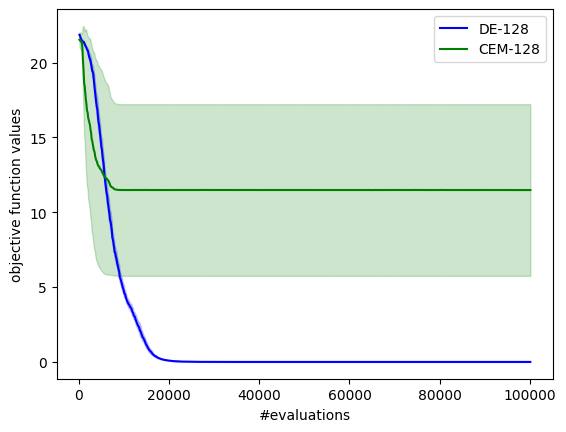

In [121]:
DE_Ackley_D10_N128_average = np.average(DE_Ackley_D10[128], axis = 0)
DE_Ackley_D10_N128_std = np.std(DE_Ackley_D10[128], axis = 0)
print(DE_Ackley_D10[128].shape, DE_Ackley_D10_N128_average.shape, DE_Ackley_D10_N128_std.shape)


CEM_Ackley_D10_N128_average = np.average(CEM_Ackley_D10[128], axis = 0)
CEM_Ackley_D10_N128_std = np.std(CEM_Ackley_D10[128], axis = 0)
print(CEM_Ackley_D10[128].shape, CEM_Ackley_D10_N128_average.shape, CEM_Ackley_D10_N128_std.shape)

fig, ax = plt.subplots()
ax.plot(DE_Ackley_D10_N128_average[:,0],DE_Ackley_D10_N128_average[:,1], color = "blue", label = 'DE-128')
ax.fill_between(DE_Ackley_D10_N128_average[:,0],
                DE_Ackley_D10_N128_average[:,1] + DE_Ackley_D10_N128_std[:,1],
                DE_Ackley_D10_N128_average[:,1] - DE_Ackley_D10_N128_std[:,1],
                alpha = 0.2, color = "blue")

ax.plot(CEM_Ackley_D10_N128_average[:,0], CEM_Ackley_D10_N128_average[:,1], color = 'green', label = 'CEM-128')
ax.fill_between(CEM_Ackley_D10_N128_average[:,0],
                CEM_Ackley_D10_N128_average[:,1] + CEM_Ackley_D10_N128_std[:,1],
                CEM_Ackley_D10_N128_average[:,1] - CEM_Ackley_D10_N128_std[:,1],
                alpha = 0.2, color = "green")

ax.legend()
ax.set_xlabel("#evaluations")
ax.set_ylabel("objective function values")

plt.show()